In [89]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import spacy
import numpy as np
from wordcloud import WordCloud

# for counting
from collections import Counter
from itertools import chain


# for punctuations
import string

#for stopwords
from nltk.corpus import stopwords

# for n-gram
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

/home/sayhan/.local/lib/python3.10/site-packages/thinc/compat.py:36: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  hasattr(torch, "has_mps")
/home/sayhan/.local/lib/python3.10/site-packages/thinc/compat.py:37: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  and torch.has_mps  # type: ignore[attr-defined]
2025-03-03 15:12:27.281653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-03 15:12:27.281691: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-03 15:12:27.282890: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already bee

In [4]:
def literal_eval_column(column):
    try:
        return ast.literal_eval(column)
    except (ValueError, SyntaxError):
        return column

columns_to_parse = [
    'tokenized_text_nltk', 'tokenized_text_spacy',
    'pos_tagged_text_spacy', 'lemmatized_text_spacy',
    'pos_tagged_text_nltk', 'stemmed_text_nltk', 'lemmatized_text_nltk',
    'bpe_tokens', 'wordpiece_tokens'
]

converters = {col: literal_eval_column for col in columns_to_parse}

preprocessed_stopword_removed = pd.read_csv('data/preprocessed_stopwords_removed.csv', converters=converters)
preprocessed=pd.read_csv('data/preprocessed.csv',converters=converters)

In [5]:
preprocessed_stopword_removed.head()

,article_link,headline,is_sarcastic,headline_cleaned,num_changes,tokenized_text_spacy,pos_tagged_text_spacy,lemmatized_text_spacy,ner_text_spacy,tokenized_text_nltk,pos_tagged_text_nltk,stemmed_text_nltk,lemmatized_text_nltk,bpe_tokens,wordpiece_tokens
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,former versace store clerk sues over secret bl...,1,"[versace, store, clerk, sues, secret, black, c...","[(versace, NOUN), (store, NOUN), (clerk, NOUN)...","[versace, store, clerk, sue, secret, black, co...",NaN,"[former, versace, store, clerk, sues, secret, ...","[(former, ADJ), (versace, NOUN), (store, NOUN)...","[former, versac, store, clerk, sue, secret, bl...","[former, versace, store, clerk, sue, secret, b...","[for, mer, vers, ace, st, ore, cl, er, k, su, ...","[for, _mer, v, _ers, _ace, st, _ore, cle, _r, ..."
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0,the roseanne revival catches up to our thorny ...,1,"[roseanne, revival, catches, thorny, political...","[(roseanne, PROPN), (revival, PROPN), (catches...","[roseanne, revival, catch, thorny, political, ...",NaN,"[roseanne, revival, catches, thorny, political...","[(roseanne, NOUN), (revival, NOUN), (catches, ...","[roseann, reviv, catch, thorni, polit, mood, b...","[roseanne, revival, catch, thorny, political, ...","[the, ro, se, an, ne, re, v, iv, al, cat, ch, ...","[the, r, _ose, _an, _n, _e, rev, _iv, _al, c, ..."
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1,mom starting to fear sons web series closest t...,1,"[mom, starting, fear, sons, web, series, close...","[(mom, NOUN), (starting, VERB), (fear, VERB), ...","[mom, start, fear, son, web, series, close, th...",NaN,"[mom, starting, fear, sons, web, series, close...","[(mom, NOUN), (starting, VERB), (fear, ADJ), (...","[mom, start, fear, son, web, seri, closest, th...","[mom, starting, fear, son, web, series, closes...","[mom, start, ing, to, fe, ar, s, ons, we, b, s...","[mom, start, _ing, to, fe, _ar, so, _ns, we, _..."
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1,boehner just wants wife to listen not come up ...,1,"[boehner, wants, wife, listen, come, alternati...","[(boehner, NOUN), (wants, VERB), (wife, NOUN),...","[boehner, want, wife, listen, come, alternativ...","[('boehner', 'ORG')]","[boehner, wants, wife, listen, come, alternati...","[(boehner, NOUN), (wants, VERB), (wife, NOUN),...","[boehner, want, wife, listen, come, altern, de...","[boehner, want, wife, listen, come, alternativ...","[bo, e, h, ner, just, wants, wi, fe, to, list,...","[bo, _e, _hn, _er, just, want, _s, w, _ife, to..."
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wishes snape happy birthday in the ...,1,"[jk, rowling, wishes, snape, happy, birthday, ...","[(jk, PROPN), (rowling, PROPN), (wishes, VERB)...","[jk, rowling, wish, snape, happy, birthday, ma...",NaN,"[jk, rowling, wishes, snape, happy, birthday, ...","[(jk, NOUN), (rowling, VERB), (wishes, NOUN), ...","[jk, rowl, wish, snape, happi, birthday, magic...","[jk, rowling, wish, snape, happy, birthday, ma...","[j, k, r, ow, ling, w, ish, es, sn, ap, e, hap...","[j, _k, r, _ow, _ling, w, _ish, _es, sn, _ap, ..."


In [6]:
df = preprocessed_stopword_removed

In [7]:
df.dtypes

article_link             object
headline                 object
is_sarcastic              int64
headline_cleaned         object
num_changes               int64
tokenized_text_spacy     object
pos_tagged_text_spacy    object
lemmatized_text_spacy    object
ner_text_spacy           object
tokenized_text_nltk      object
pos_tagged_text_nltk     object
stemmed_text_nltk        object
lemmatized_text_nltk     object
bpe_tokens               object
wordpiece_tokens         object
dtype: object

In [8]:
#check any missing value
print(df.isnull().sum())

article_link                 0
headline                     0
is_sarcastic                 0
headline_cleaned             0
num_changes                  0
tokenized_text_spacy         0
pos_tagged_text_spacy        0
lemmatized_text_spacy        0
ner_text_spacy           11614
tokenized_text_nltk          0
pos_tagged_text_nltk         0
stemmed_text_nltk            0
lemmatized_text_nltk         0
bpe_tokens                   0
wordpiece_tokens             0
dtype: int64


## Category Distribution

Category 0.0: 14985.0 (56.10%)
Category 1.0: 11724.0 (43.90%)


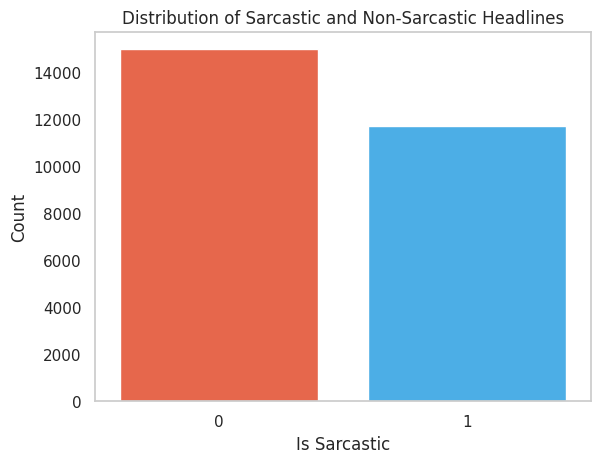

In [27]:
sarcasm_counts = df['is_sarcastic'].value_counts().reset_index()
sarcasm_counts.columns = ['is_sarcastic', 'count']

# % of each catogrie
total_count = df.shape[0]
sarcasm_counts['percentage'] = sarcasm_counts['count'] / total_count * 100
for index, row in sarcasm_counts.iterrows():
    print(f"Category {row['is_sarcastic']}: {row['count']} ({row['percentage']:.2f}%)")

# plot the distribution of sarcastic and non-sarcastic Headlines
sns.barplot(x='is_sarcastic', y='count', data=sarcasm_counts, hue='is_sarcastic', palette=colors, dodge=False, legend=False)
plt.xlabel('Is Sarcastic')
plt.ylabel('Count')
plt.title('Distribution of Sarcastic and Non-Sarcastic Headlines')
plt.grid(False)
plt.show()

The data is relative balanced, with 56.1% non-sarcastic headlines and 43.9% saractic ones.

## Length-related Exploration

In [28]:
# we will use the stopwords removed version for this part od exploration

### Length in Words Distribution

In [72]:
df['length_words_nltk'] = df['tokenized_text_nltk'].apply(len)
df['length_words_spacy'] = df['tokenized_text_spacy'].apply(len)

In [86]:
df[df.length_words_nltk > df.length_words_spacy]

,article_link,headline,is_sarcastic,headline_cleaned,num_changes,tokenized_text_nltk,tokenized_text_spacy,pos_tagged_text_spacy,lemmatized_text_spacy,pos_tagged_text_nltk,stemmed_text_nltk,lemmatized_text_nltk,bpe_tokens,wordpiece_tokens,length_words_nltk,length_words_spacy
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0,former versace store clerk sues over secret bl...,1,"[former, versace, store, clerk, sues, secret, ...","[versace, store, clerk, sues, secret, black, c...","[(versace, NOUN), (store, NOUN), (clerk, NOUN)...","[versace, store, clerk, sue, secret, black, co...","[(former, ADJ), (versace, NOUN), (store, NOUN)...","[former, versac, store, clerk, sue, secret, bl...","[former, versace, store, clerk, sue, secret, b...","[for, mer, vers, ace, st, ore, cl, er, k, su, ...","[for, _mer, v, _ers, _ace, st, _ore, cle, _r, ...",10,9
8,https://politics.theonion.com/top-snake-handle...,top snake handler leaves sinking huckabee camp...,1,top snake handler leaves sinking huckabee camp...,0,"[top, snake, handler, leaves, sinking, huckabe...","[snake, handler, leaves, sinking, huckabee, ca...","[(snake, NOUN), (handler, NOUN), (leaves, NOUN...","[snake, handler, leave, sink, huckabee, campaign]","[(top, ADJ), (snake, NOUN), (handler, NOUN), (...","[top, snake, handler, leav, sink, huckabe, cam...","[top, snake, handler, leaf, sinking, huckabee,...","[top, sn, ake, hand, l, er, le, av, es, s, in,...","[top, sn, _ake, ha, _n, _d, _le, _r, le, _ave,...",7,6
12,https://www.huffingtonpost.comhttp://www.thegu...,north korea praises trump and urges us voters ...,0,north korea praises trump and urges us voters ...,1,"[north, korea, praises, trump, urges, us, vote...","[north, korea, praises, trump, urges, voters, ...","[(north, PROPN), (korea, PROPN), (praises, VER...","[north, korea, praise, trump, urge, voter, rej...","[(north, ADJ), (korea, NOUN), (praises, NOUN),...","[north, korea, prais, trump, urg, voter, rejec...","[north, korea, praise, trump, urge, voter, rej...","[north, k, ore, a, pr, a, is, es, trump, and, ...","[north, k, _ore, _a, pr, _a, _ise, _s, trump, ...",10,9
13,https://www.huffingtonpost.com/entry/jeffrey-l...,"actually, cnn's jeffrey lord has been 'indefen...",0,actually cnns jeffrey lord has been indefensib...,1,"[actually, cnns, jeffrey, lord, has, indefensi...","[actually, cnns, jeffrey, lord, indefensible]","[(actually, ADV), (cnns, VERB), (jeffrey, PROP...","[actually, cnn, jeffrey, lord, indefensible]","[(actually, ADV), (cnns, ADJ), (jeffrey, NOUN)...","[actual, cnn, jeffrey, lord, ha, indefens]","[actually, cnns, jeffrey, lord, ha, indefensible]","[actually, c, n, ns, je, ff, re, y, l, or, d, ...","[act, _ually, c, _n, _ns, je, _ff, _re, _y, l,...",6,5
20,https://local.theonion.com/courtroom-sketch-ar...,courtroom sketch artist has clear manga influe...,1,courtroom sketch artist has clear manga influe...,0,"[courtroom, sketch, artist, has, clear, manga,...","[courtroom, sketch, artist, clear, manga, infl...","[(courtroom, NOUN), (sketch, NOUN), (artist, N...","[courtroom, sketch, artist, clear, manga, infl...","[(courtroom, NOUN), (sketch, NOUN), (artist, N...","[courtroom, sketch, artist, ha, clear, manga, ...","[courtroom, sketch, artist, ha, clear, manga, ...","[cour, tr, o, om, s, ket, ch, art, ist, has, c...","[court, _r, _oom, sk, _et, _ch, art, _ist, has...",7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26688,https://local.theonion.com/report-uttering-phr...,report: uttering phrase 'easy does it' prevent...,1,report uttering phrase easy does it prevents 7...,1,"[report, uttering, phrase, easy, does, prevent...","[report, uttering, phrase, easy, prevents, 78,...","[(report, VERB), (uttering, VERB), (phrase, NO...","[report, utter, phrase, easy, prevent, 78, dry...","[(report, NOUN), (uttering, VERB), (phrase, AD...","[report, utter, phrase, easi, doe, prevent, dr...","[report, uttering, phrase, easy, doe, prevents...","[

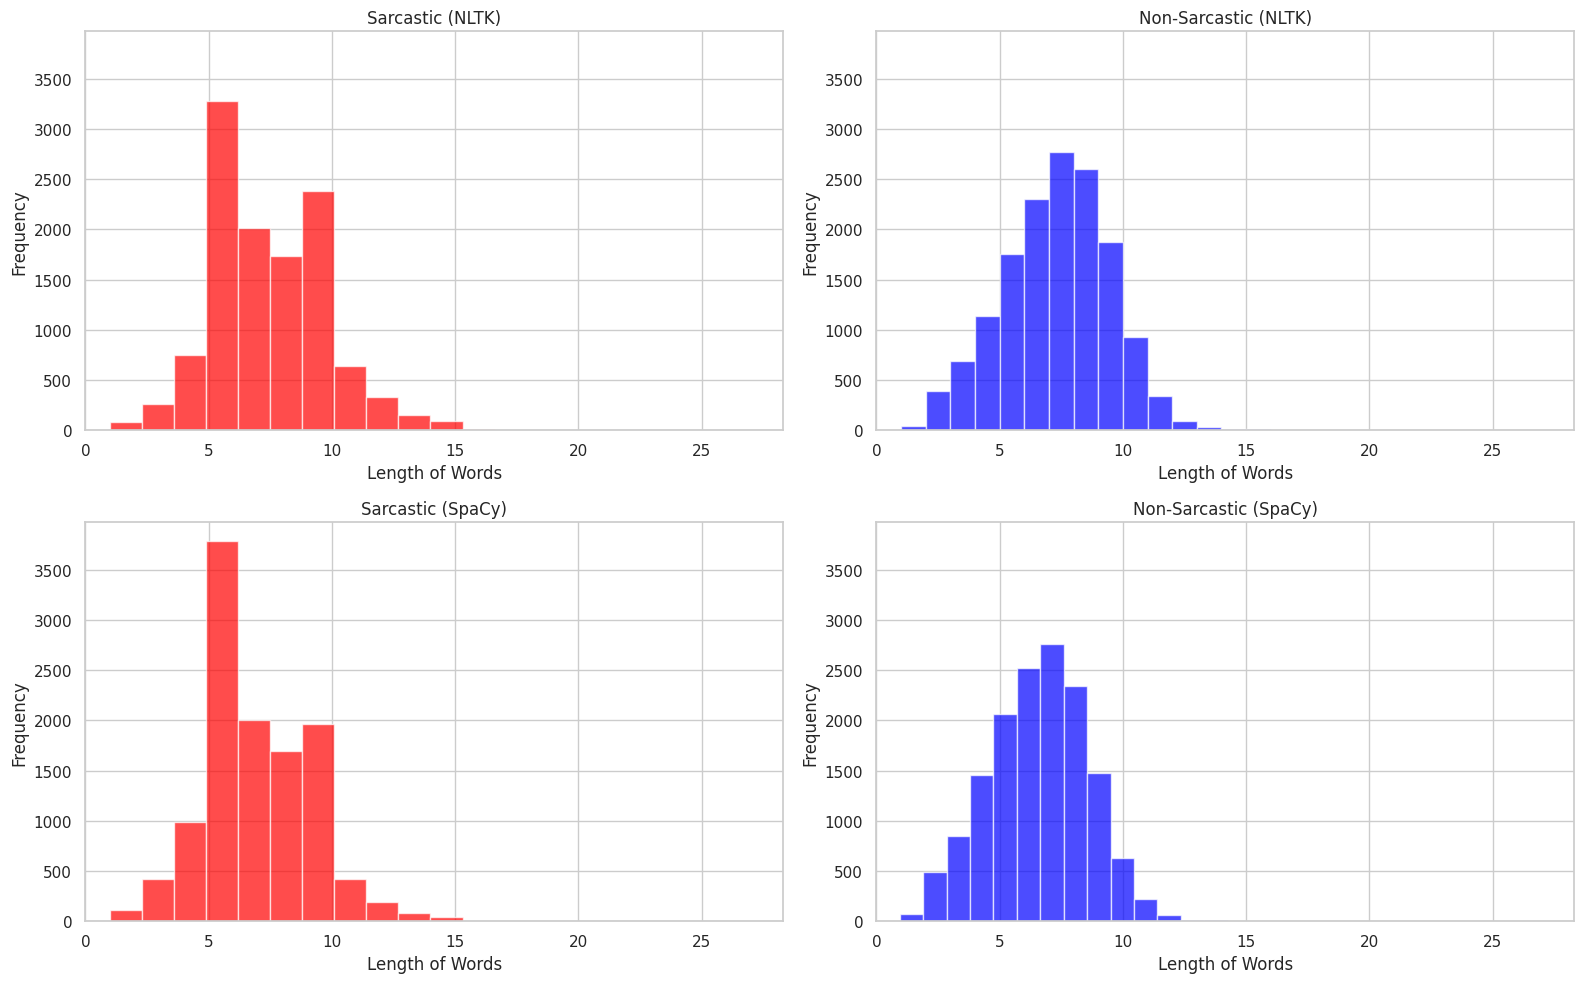

In [83]:
# The distribution of sarcastic and non-sarcastic headlines under different length word features(nltk and SpaCy)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# length_words_nltk(Sarcastic)
text_len_nltk_sarcastic = df[df['is_sarcastic'] == 1]['length_words_nltk']
ax1.hist(text_len_nltk_sarcastic, bins=20, color='red', alpha=0.7)
ax1.set_title('Sarcastic (NLTK)')
ax1.set_xlabel('Length of Words')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# length_words_nltk(Non-Sarcastic)
text_len_nltk_non_sarcastic = df[df['is_sarcastic'] == 0]['length_words_nltk']
ax2.hist(text_len_nltk_non_sarcastic, bins=20, color='blue', alpha=0.7)
ax2.set_title('Non-Sarcastic (NLTK)')
ax2.set_xlabel('Length of Words')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# length_words_spacy(Sarcastic)
text_len_spacy_sarcastic = df[df['is_sarcastic'] == 1]['length_words_spacy']
ax3.hist(text_len_spacy_sarcastic, bins=20, color='red', alpha=0.7)
ax3.set_title('Sarcastic (SpaCy)')
ax3.set_xlabel('Length of Words')
ax3.set_ylabel('Frequency')
ax3.grid(True)

# length_words_spacy(Non-Sarcastic)
text_len_spacy_non_sarcastic = df[df['is_sarcastic'] == 0]['length_words_spacy']
ax4.hist(text_len_spacy_non_sarcastic, bins=20, color='blue', alpha=0.7)
ax4.set_title('Non-Sarcastic (SpaCy)')
ax4.set_xlabel('Length of Words')
ax4.set_ylabel('Frequency')
ax4.grid(True)


max_xlim = max(ax1.get_xlim()[1], ax2.get_xlim()[1], ax3.get_xlim()[1], ax4.get_xlim()[1])
max_ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1], ax3.get_ylim()[1], ax4.get_ylim()[1])

ax1.set_xlim(0, max_xlim)
ax2.set_xlim(0, max_xlim)
ax3.set_xlim(0, max_xlim)
ax4.set_xlim(0, max_xlim)

ax1.set_ylim(0, max_ylim)
ax2.set_ylim(0, max_ylim)
ax3.set_ylim(0, max_ylim)
ax4.set_ylim(0, max_ylim)

plt.tight_layout()
plt.show()

We found that for Sarcastic headlines, many cases have word length at around 5 and for non-sarcastic headlines, they are more well normalized distributed centered at word length around 7.

There is no much difference between the use of NLTK and Spacy. For Spacy method, a headline tend to have less word length after tokenization.

### Length in Characters Distribution

In [112]:
df['length_chars_nltk'] = df['tokenized_text_nltk'].apply(lambda x: ''.join(word for word in x)).apply(lambda x: len(x))
df['length_chars_spacy'] = df['tokenized_text_spacy'].apply(lambda x: ''.join(word for word in x)).apply(lambda x: len(x))

In [124]:
print("The mean of sarcastic character length is" ,round(np.mean(df[df['is_sarcastic'] == 1]['length_chars_nltk']),2))
print("The mean of non-sarcastic character length is" ,round(np.mean(df[df['is_sarcastic'] == 0]['length_chars_nltk']),2))


The mean of sarcastic character length is 45.8
The mean of sarcastic character length is 40.93


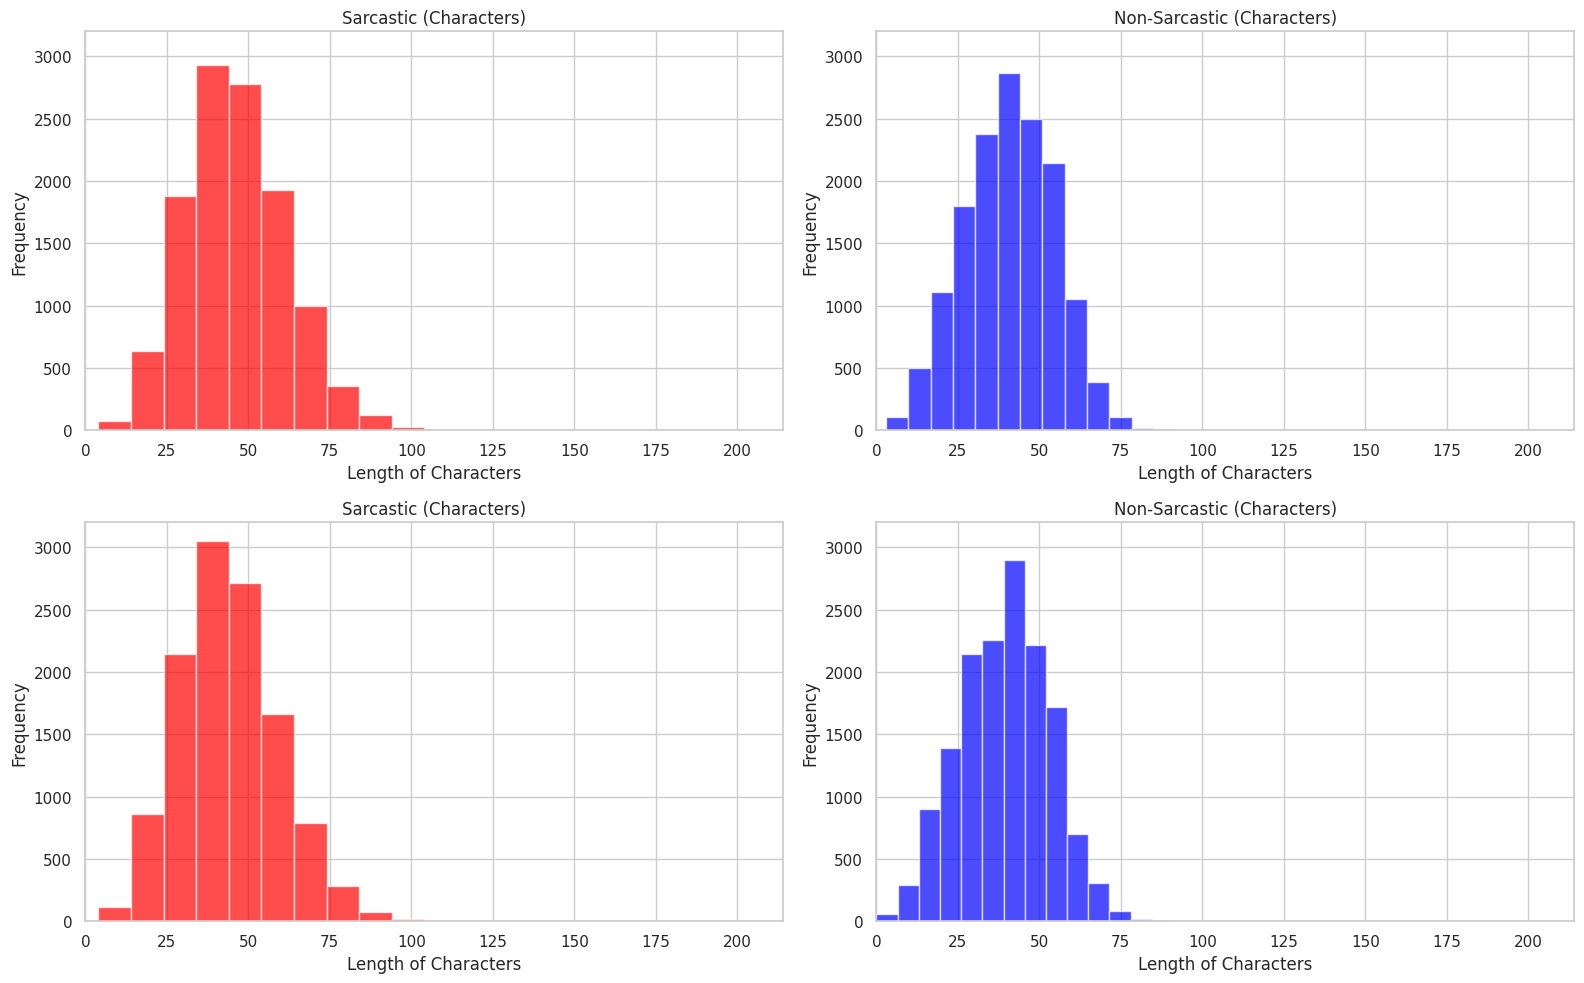

In [113]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# length_chars_nltk(Sarcastic)
text_len_chars_sarcastic = df[df['is_sarcastic'] == 1]['length_chars_nltk']
ax1.hist(text_len_chars_sarcastic, bins=20, color='red', alpha=0.7)
ax1.set_title('Sarcastic (Characters)')
ax1.set_xlabel('Length of Characters')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# length_chars_nltk(Non-Sarcastic)
text_len_chars_non_sarcastic = df[df['is_sarcastic'] == 0]['length_chars_nltk']
ax2.hist(text_len_chars_non_sarcastic, bins=20, color='blue', alpha=0.7)
ax2.set_title('Non-Sarcastic (Characters)')
ax2.set_xlabel('Length of Characters')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# length_chars_spacy(Sarcastic)
text_len_chars_spacy_sarcastic = df[df['is_sarcastic'] == 1]['length_chars_spacy']
ax3.hist(text_len_chars_spacy_sarcastic, bins=20, color='red', alpha=0.7)
ax3.set_title('Sarcastic (Characters)')
ax3.set_xlabel('Length of Characters')
ax3.set_ylabel('Frequency')
ax3.grid(True)

# length_chars_spacy(Non-Sarcastic)
text_len_chars_spacy_non_sarcastic = df[df['is_sarcastic'] == 0]['length_chars_spacy']
ax4.hist(text_len_chars_spacy_non_sarcastic, bins=20, color='blue', alpha=0.7)
ax4.set_title('Non-Sarcastic (Characters)')
ax4.set_xlabel('Length of Characters')
ax4.set_ylabel('Frequency')
ax4.grid(True)

max_xlim = max(ax1.get_xlim()[1], ax2.get_xlim()[1], ax3.get_xlim()[1], ax4.get_xlim()[1])
max_ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1], ax3.get_ylim()[1], ax4.get_ylim()[1])

ax1.set_xlim(0, max_xlim)
ax2.set_xlim(0, max_xlim)
ax3.set_xlim(0, max_xlim)
ax4.set_xlim(0, max_xlim)

ax1.set_ylim(0, max_ylim)
ax2.set_ylim(0, max_ylim)
ax3.set_ylim(0, max_ylim)
ax4.set_ylim(0, max_ylim)

plt.tight_layout()
plt.show()

Sarcastic headlines tend to have larger character length than non-sacrastic haedlines.

There is no much difference between the use of NLTK and Spacy.

### Average Word Length

In [125]:
df['avg_word_len_nltk'] = df['length_chars_nltk']/df['length_words_nltk']
df['avg_word_len_spacy'] = df['length_chars_spacy']/df['length_words_spacy']

In [129]:
print("The average of sarcastic character length is" ,round(np.mean(df[df['is_sarcastic'] == 1]['avg_word_len_nltk']),2))
print("The average of non-sarcastic character length is" ,round(np.mean(df[df['is_sarcastic'] == 0]['avg_word_len_nltk']),2))

The average of sarcastic character length is 6.2
The average of non-sarcastic character length is 6.05


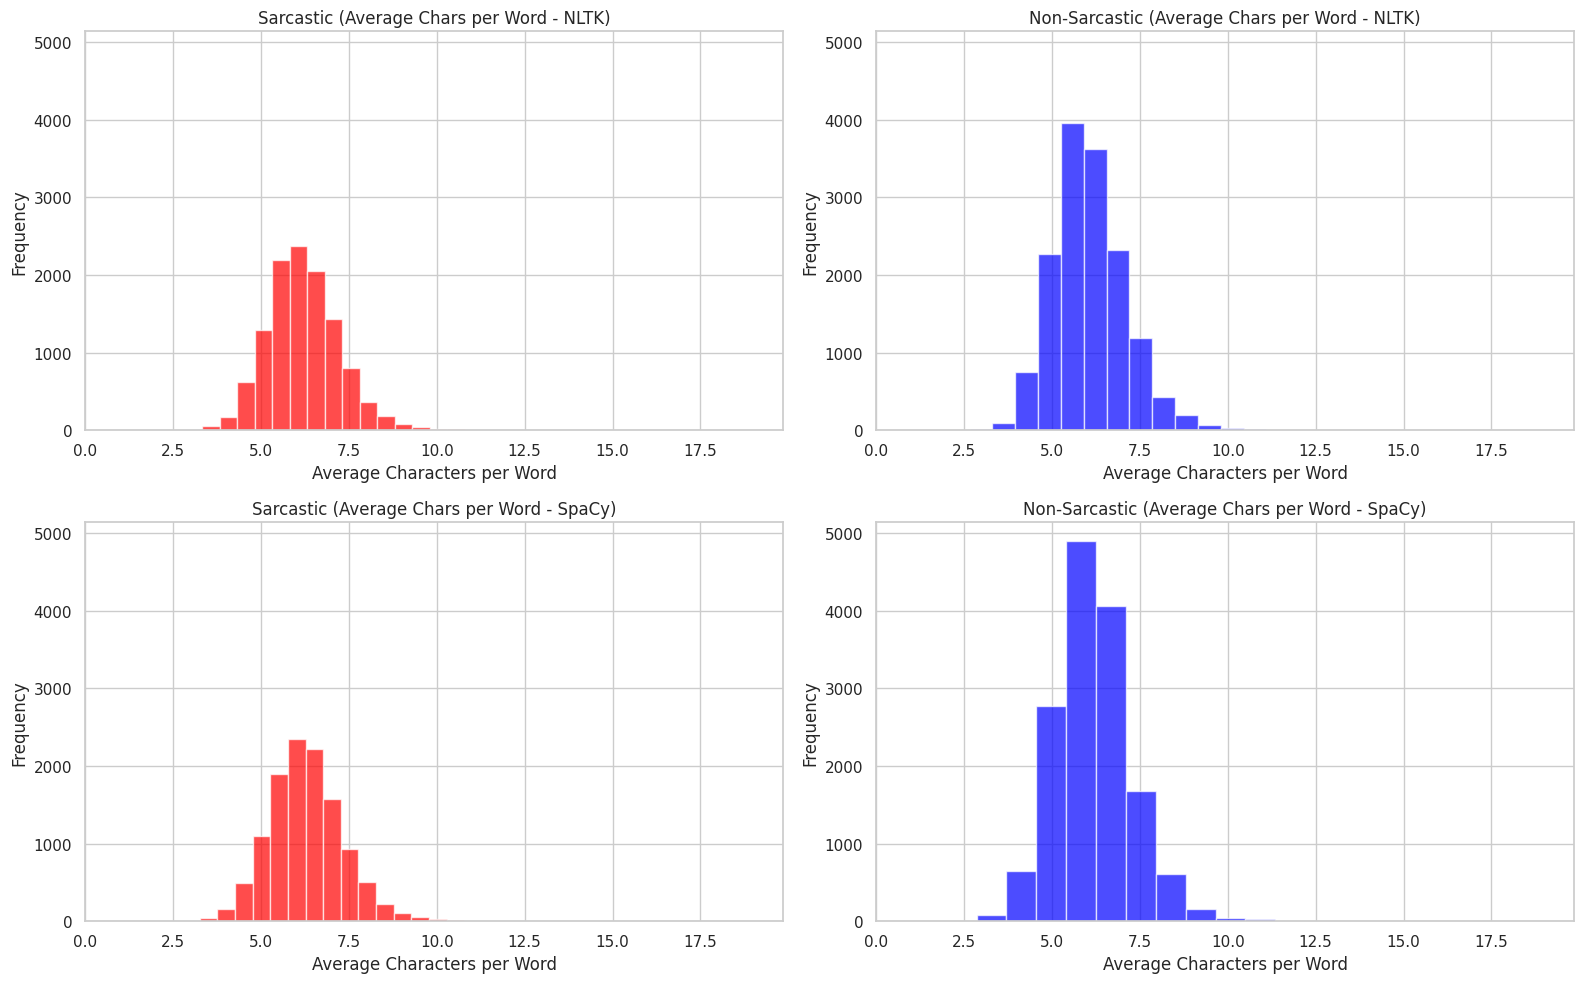

In [127]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 10))

# avg_chars_per_word_nltk(Sarcastic)
avg_chars_nltk_sarcastic = df[df['is_sarcastic'] == 1]['avg_word_len_nltk']
ax1.hist(avg_chars_nltk_sarcastic, bins=20, color='red', alpha=0.7)
ax1.set_title('Sarcastic (Average Chars per Word - NLTK)')
ax1.set_xlabel('Average Characters per Word')
ax1.set_ylabel('Frequency')
ax1.grid(True)

# avg_chars_per_word_nltk(Non-Sarcastic)
avg_chars_nltk_non_sarcastic = df[df['is_sarcastic'] == 0]['avg_word_len_nltk']
ax2.hist(avg_chars_nltk_non_sarcastic, bins=20, color='blue', alpha=0.7)
ax2.set_title('Non-Sarcastic (Average Chars per Word - NLTK)')
ax2.set_xlabel('Average Characters per Word')
ax2.set_ylabel('Frequency')
ax2.grid(True)

# avg_chars_per_word_spacy(Sarcastic)
avg_chars_spacy_sarcastic = df[df['is_sarcastic'] == 1]['avg_word_len_spacy']
ax3.hist(avg_chars_spacy_sarcastic, bins=20, color='red', alpha=0.7)
ax3.set_title('Sarcastic (Average Chars per Word - SpaCy)')
ax3.set_xlabel('Average Characters per Word')
ax3.set_ylabel('Frequency')
ax3.grid(True)

# avg_chars_per_word_spacy(Non-Sarcastic)
avg_chars_spacy_non_sarcastic = df[df['is_sarcastic'] == 0]['avg_word_len_spacy']
ax4.hist(avg_chars_spacy_non_sarcastic, bins=20, color='blue', alpha=0.7)
ax4.set_title('Non-Sarcastic (Average Chars per Word - SpaCy)')
ax4.set_xlabel('Average Characters per Word')
ax4.set_ylabel('Frequency')
ax4.grid(True)

max_xlim = max(ax1.get_xlim()[1], ax2.get_xlim()[1], ax3.get_xlim()[1], ax4.get_xlim()[1])
max_ylim = max(ax1.get_ylim()[1], ax2.get_ylim()[1], ax3.get_ylim()[1], ax4.get_ylim()[1])

ax1.set_xlim(0, max_xlim)
ax2.set_xlim(0, max_xlim)
ax3.set_xlim(0, max_xlim)
ax4.set_xlim(0, max_xlim)

ax1.set_ylim(0, max_ylim)
ax2.set_ylim(0, max_ylim)
ax3.set_ylim(0, max_ylim)
ax4.set_ylim(0, max_ylim)

plt.tight_layout()
plt.show()

## Top Frequent Tags and Associated Word

### Overall Data

In [191]:
# count the occurrence of tags
POS_list = preprocessed_stopword_removed['pos_tagged_text_nltk'].tolist()
POS_count = Counter(chain(*POS_list))

In [192]:
POS_frequent_df = pd.DataFrame.from_dict(POS_count, orient='index').reset_index()
POS_frequent_df.columns = ['POS_tags', 'Count']
POS_frequent_df = POS_frequent_df.sort_values(by=['Count'], ascending=False)
POS_frequent_df['Word'] = POS_frequent_df['POS_tags'].apply(lambda x: x[0])
POS_frequent_df['Tag'] = POS_frequent_df['POS_tags'].apply(lambda x: x[1])
POS_frequent_df

,POS_tags,Count,Word,Tag
361,"(new, ADJ)",1516,new,ADJ
74,"(man, NOUN)",1250,man,NOUN
144,"(trump, NOUN)",1001,trump,NOUN
99,"(has, VERB)",596,has,VERB
433,"(one, NUM)",512,one,NUM
...,...,...,...,...
20690,"(skulking, VERB)",1,skulking,VERB
20686,"(wormhole, ADJ)",1,wormhole,ADJ
20682,"(cassidy, VERB)",1,cassidy,VERB
20681,"(sen, ADJ)",1,sen,ADJ


In [193]:
# stop words
stop_words = stopwords.words('english')
# punctuations
list_punctuations = []
punctuations = string.punctuation
for x in punctuations:
    list_punctuations.append(x)

# remove stop words and punctuations
POS_frequent_df = POS_frequent_df.query("Word not in @stop_words & Word not in @list_punctuations")
POS_frequent_df

,POS_tags,Count,Word,Tag
361,"(new, ADJ)",1516,new,ADJ
74,"(man, NOUN)",1250,man,NOUN
144,"(trump, NOUN)",1001,trump,NOUN
433,"(one, NUM)",512,one,NUM
409,"(report, NOUN)",503,report,NOUN
...,...,...,...,...
20690,"(skulking, VERB)",1,skulking,VERB
20686,"(wormhole, ADJ)",1,wormhole,ADJ
20682,"(cassidy, VERB)",1,cassidy,VERB
20681,"(sen, ADJ)",1,sen,ADJ


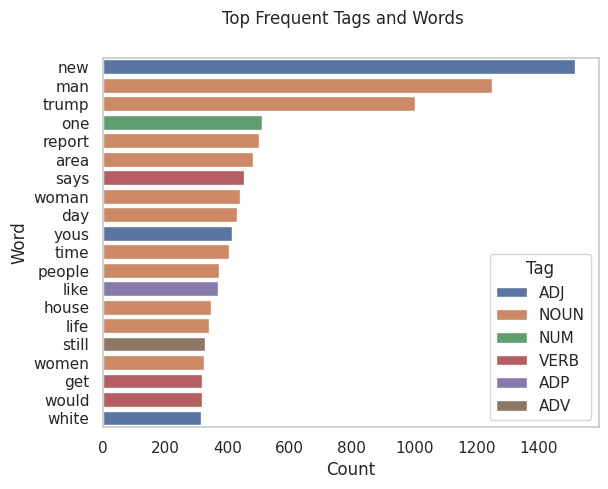

In [194]:
fig, ax = plt.subplots()
fig.suptitle("Top Frequent Tags and Words", fontsize=12)
sns.barplot(x='Count', y='Word', hue='Tag',
            data=POS_frequent_df.iloc[:20,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

Most top frequent words are just common words. Specifically, several interesting words such as trump which may indiciate the existance of NER.

### Sarcastic Headlines Data

In [195]:
# count the occurrence of tags in sarcastic headlines
sarcastic_POS_list = preprocessed_stopword_removed[preprocessed_stopword_removed['is_sarcastic']==1].pos_tagged_text_nltk.tolist()
sarcastic_POS_count = Counter(chain(*sarcastic_POS_list))

In [196]:
sarcastic_POS_frequent_df = pd.DataFrame.from_dict(sarcastic_POS_count, orient='index').reset_index()
sarcastic_POS_frequent_df.columns = ['sarcastic_POS_tags', 'Count']
sarcastic_POS_frequent_df = sarcastic_POS_frequent_df.sort_values(by=['Count'], ascending=False)
sarcastic_POS_frequent_df['Word'] = sarcastic_POS_frequent_df['sarcastic_POS_tags'].apply(lambda x: x[0])
sarcastic_POS_frequent_df['Tag'] = sarcastic_POS_frequent_df['sarcastic_POS_tags'].apply(lambda x: x[1])

In [197]:
sarcastic_POS_frequent_df = sarcastic_POS_frequent_df.query("Word not in @stop_words & Word not in @list_punctuations")
sarcastic_POS_frequent_df

,sarcastic_POS_tags,Count,Word,Tag
254,"(man, NOUN)",1032,man,NOUN
123,"(new, ADJ)",839,new,ADJ
181,"(area, NOUN)",477,area,NOUN
156,"(report, NOUN)",419,report,NOUN
182,"(woman, NOUN)",293,woman,NOUN
...,...,...,...,...
12583,"(neglected, ADJ)",1,neglected,ADJ
12584,"(popsicle, NOUN)",1,popsicle,NOUN
12586,"(mms, ADJ)",1,mms,ADJ
12587,"(exec, ADJ)",1,exec,ADJ


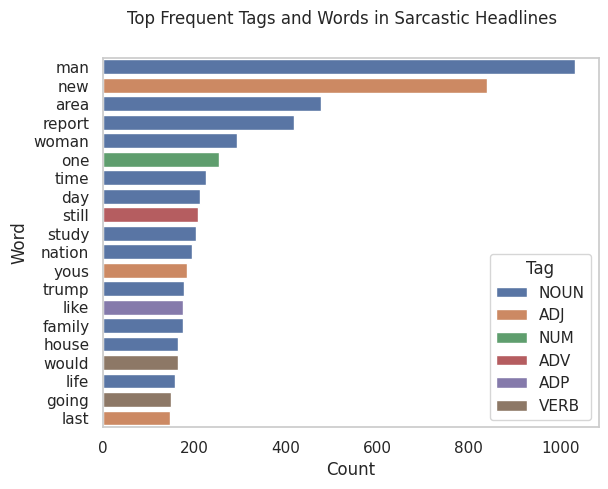

In [198]:
fig, ax = plt.subplots()
fig.suptitle("Top Frequent Tags and Words in Sarcastic Headlines", fontsize=12)
sns.barplot(x='Count', y='Word', hue='Tag',
            data=sarcastic_POS_frequent_df.iloc[:20,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

### Non-Sarcastic Headlines Data

In [199]:
# count the occurrence of tags in sarcastic headlines
non_sarcastic_POS_list = preprocessed_stopword_removed[preprocessed_stopword_removed['is_sarcastic']==0].pos_tagged_text_nltk.tolist()
non_sarcastic_POS_count = Counter(chain(*non_sarcastic_POS_list))

In [200]:
non_sarcastic_POS_frequent_df = pd.DataFrame.from_dict(non_sarcastic_POS_count, orient='index').reset_index()
non_sarcastic_POS_frequent_df.columns = ['non_sarcastic_POS_tags', 'Count']
non_sarcastic_POS_frequent_df = non_sarcastic_POS_frequent_df.sort_values(by=['Count'], ascending=False)
non_sarcastic_POS_frequent_df['Word'] = non_sarcastic_POS_frequent_df['non_sarcastic_POS_tags'].apply(lambda x: x[0])
non_sarcastic_POS_frequent_df['Tag'] = non_sarcastic_POS_frequent_df['non_sarcastic_POS_tags'].apply(lambda x: x[1])

In [201]:
non_sarcastic_POS_frequent_df = non_sarcastic_POS_frequent_df.query("Word not in @stop_words & Word not in @list_punctuations")
non_sarcastic_POS_frequent_df

,non_sarcastic_POS_tags,Count,Word,Tag
233,"(trump, NOUN)",823,trump,NOUN
696,"(new, ADJ)",677,new,ADJ
431,"(says, VERB)",349,says,VERB
44,"(trumps, NOUN)",297,trumps,NOUN
263,"(one, NUM)",258,one,NUM
...,...,...,...,...
13208,"(picky, ADJ)",1,picky,ADJ
13209,"(eater, NOUN)",1,eater,NOUN
13210,"(prescription, ADJ)",1,prescription,ADJ
13212,"(abysmally, ADV)",1,abysmally,ADV


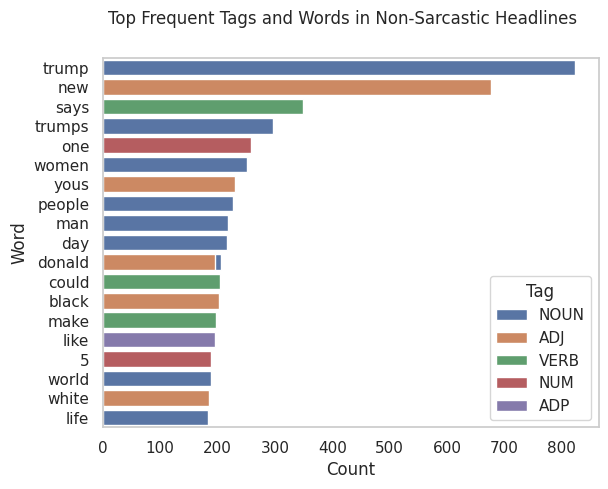

In [202]:
fig, ax = plt.subplots()
fig.suptitle("Top Frequent Tags and Words in Non-Sarcastic Headlines", fontsize=12)
sns.barplot(x='Count', y='Word', hue='Tag',
            data=non_sarcastic_POS_frequent_df.iloc[:20,:], dodge=False, ax=ax)
ax.grid(axis="x")
plt.show()

Surprisingly, Trump is the Top 1 frequent words in non-sarcastic word.

### Frequent Word Cloud

In [203]:
sarcastic_word_freq = sarcastic_POS_frequent_df.groupby('Word')['Count'].sum().to_dict()
non_sarcastic_word_freq = non_sarcastic_POS_frequent_df.groupby('Word')['Count'].sum().to_dict()

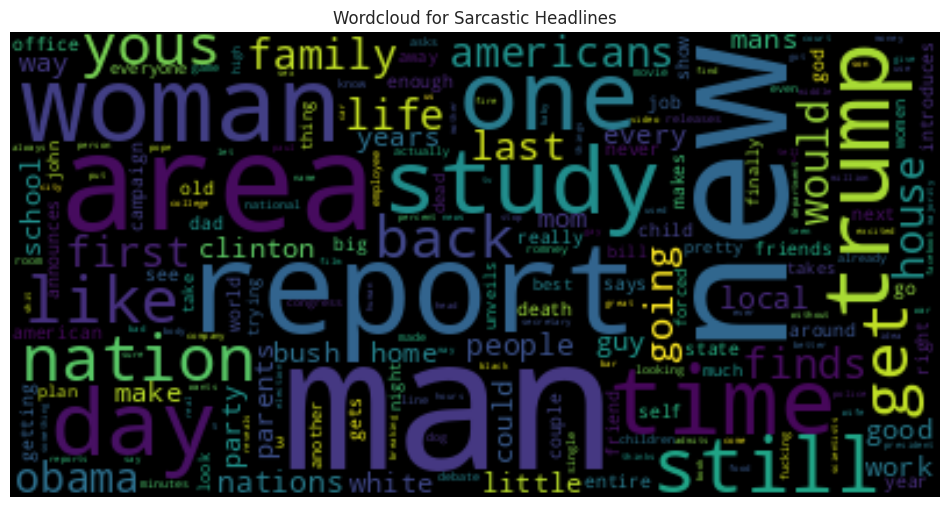

In [204]:
#Word Cloud for arcastic headlines
word_cloud = WordCloud(background_color='black', max_font_size=80).generate_from_frequencies(sarcastic_word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Sarcastic Headlines")
plt.show()

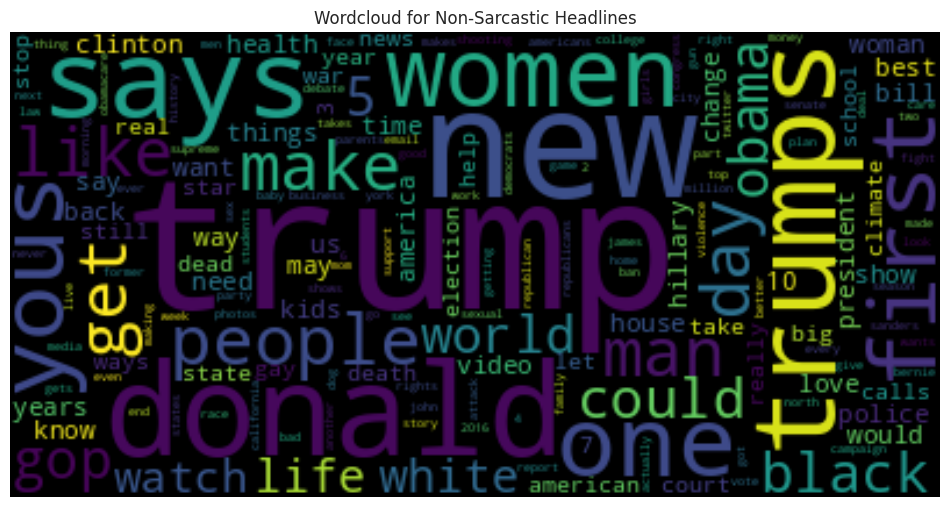

In [205]:
#Word Cloud for non-sarcastic headlines
word_cloud = WordCloud(background_color='black', max_font_size=80).generate_from_frequencies(non_sarcastic_word_freq)

plt.figure(figsize=(12, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Wordcloud for Non-Sarcastic Headlines")
plt.show()

## Weighted Words - Bag of Words (BoW) - Bag of n-grams

### Frequency Vector

In [189]:
# bigrams frequency
vec = CountVectorizer(ngram_range=(2, 2))
bow = vec.fit_transform(preprocessed_stopword_removed['tokenized_text_nltk'].str.join(' '))
sum_of_words = bow.sum(axis=0)
bigrams_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
bigrams_freq =sorted(bigrams_freq, key = lambda x: x[1], reverse=True)
bigrams_freq = pd.DataFrame(bigrams_freq[:50], columns=["bigrams", "frequency"])

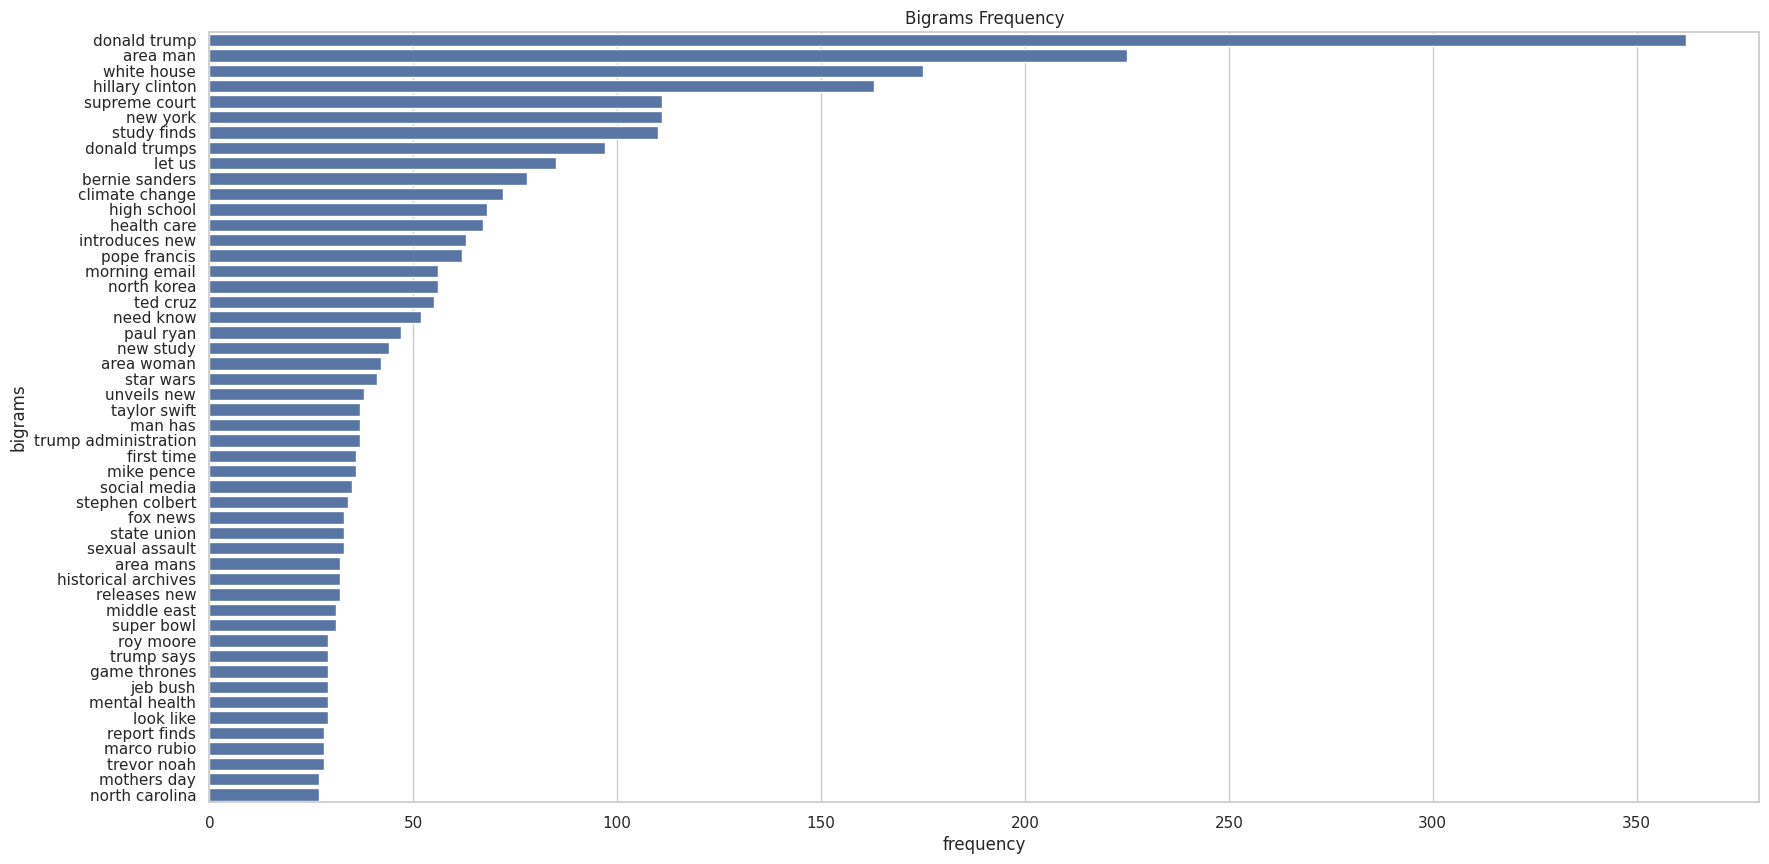

In [190]:
plt.figure(figsize=(20,10))
sns.barplot(data = bigrams_freq, x = "frequency", y="bigrams")
plt.title("Bigrams Frequency")
plt.show()

"donald trump" is the most frequent bigrams, and also other many political related bigrams such as white house, supreme court.

In [206]:
# trigrams frequency
vec = CountVectorizer(ngram_range=(3, 3))
bow = vec.fit_transform(preprocessed_stopword_removed['tokenized_text_nltk'].str.join(' '))
sum_of_words = bow.sum(axis=0)
trigrams_freq = [(word, sum_of_words[0, idx]) for word, idx in vec.vocabulary_.items()]
trigrams_freq =sorted(trigrams_freq, key = lambda x: x[1], reverse=True)
trigrams_freq = pd.DataFrame(trigrams_freq[:50], columns=["trigrams", "frequency"])

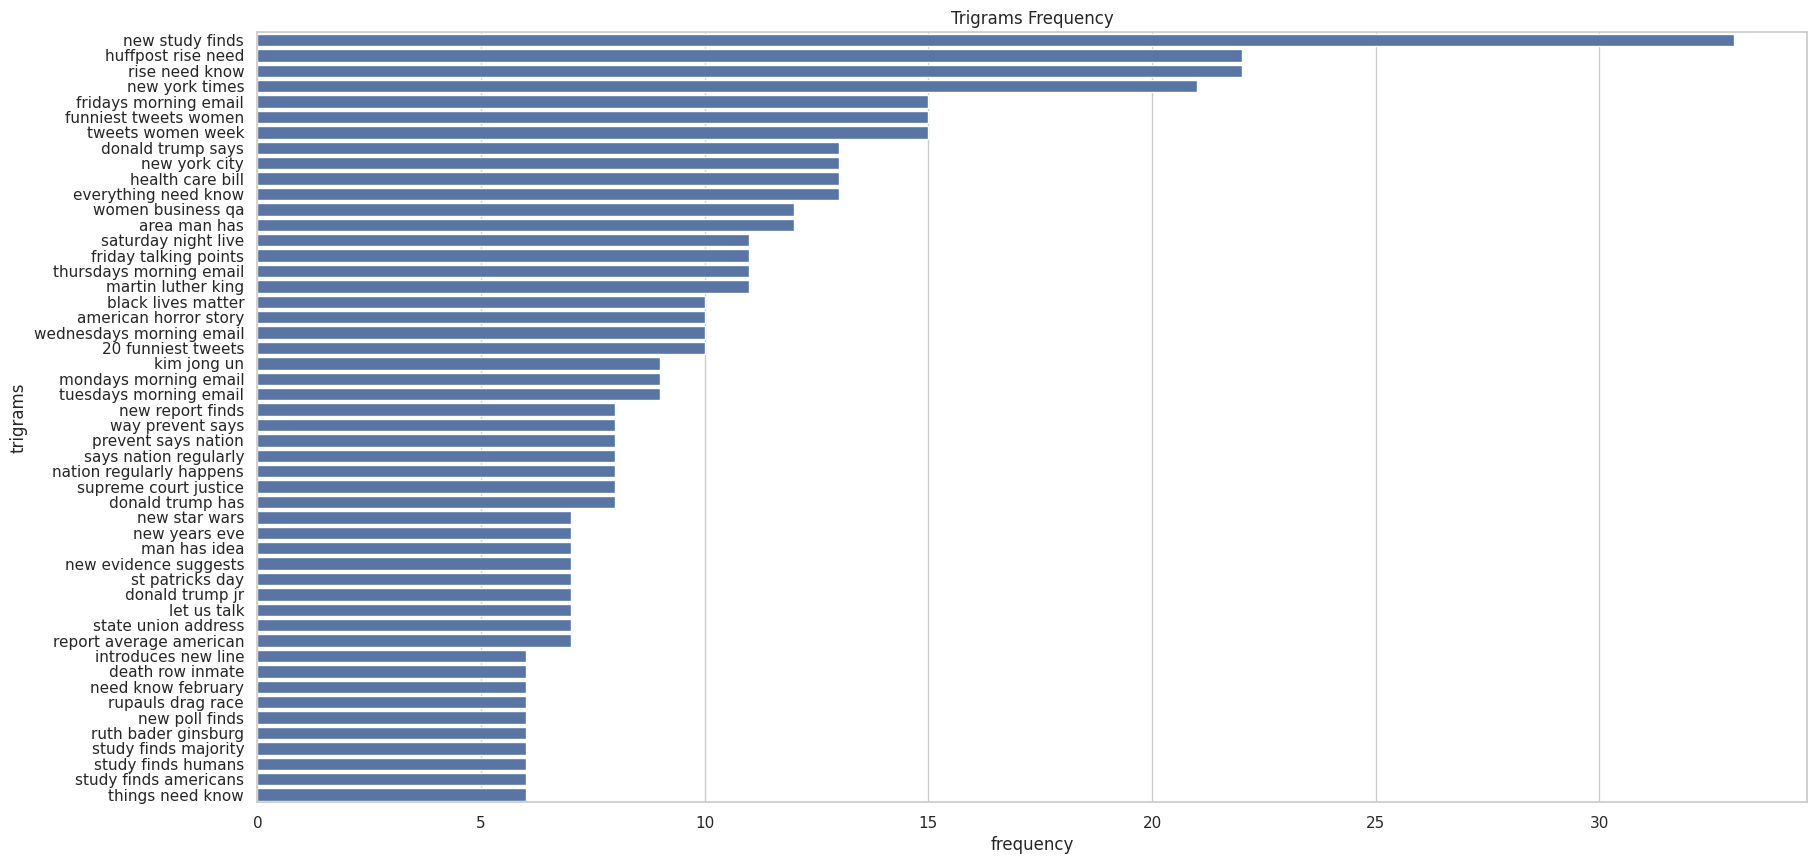

In [207]:
plt.figure(figsize=(20,10))
sns.barplot(data = trigrams_freq, x = "frequency", y="trigrams")
plt.title("Trigrams Frequency")
plt.show()

### Term Frequency-Inverse Document Frequency (TF-IDF)

In [208]:
# bigrams frequency
tfidf =  TfidfVectorizer(ngram_range=(2, 2))
bow = tfidf.fit_transform(preprocessed_stopword_removed['tokenized_text_nltk'].str.join(' '))
sum_of_words = bow.sum(axis=0)
bigrams_freq = [(word, sum_of_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
bigrams_freq =sorted(bigrams_freq, key = lambda x: x[1], reverse=True)
bigrams_freq = pd.DataFrame(bigrams_freq[:50], columns=["bigrams", "frequency"])

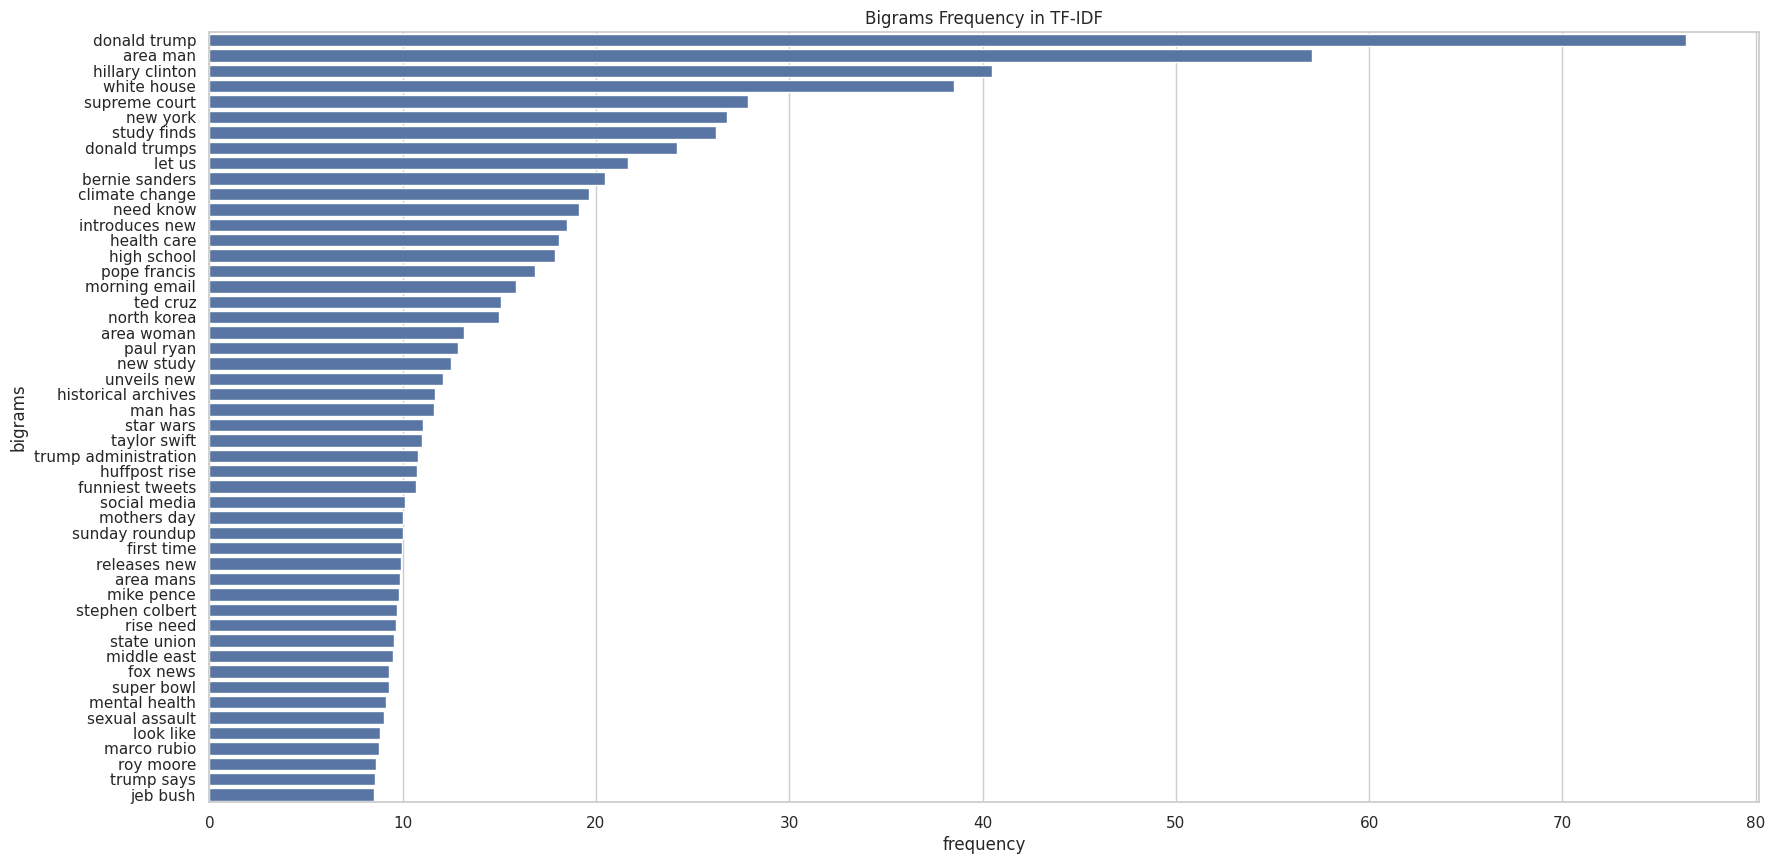

In [209]:
plt.figure(figsize=(20,10))
sns.barplot(data = bigrams_freq, x = "frequency", y="bigrams")
plt.title("Bigrams Frequency in TF-IDF")
plt.show()

In [219]:
# bigrams frequency of sarcastic headlines
processed_df_sarcastic = preprocessed_stopword_removed[preprocessed_stopword_removed['is_sarcastic']==1]

tfidf =  TfidfVectorizer(ngram_range=(2, 2))
bow_sarcastic = tfidf.fit_transform(processed_df_sarcastic['tokenized_text_nltk'].str.join(' '))
sum_of_words_sarcastic = bow_sarcastic.sum(axis=0)
bigrams_freq_sarcastic = [(word, sum_of_words_sarcastic[0, idx]) for word, idx in tfidf.vocabulary_.items()]
bigrams_freq_sarcastic =sorted(bigrams_freq_sarcastic, key = lambda x: x[1], reverse=True)
bigrams_freq_sarcastic = pd.DataFrame(bigrams_freq_sarcastic[:50], columns=["bigrams", "frequency"])

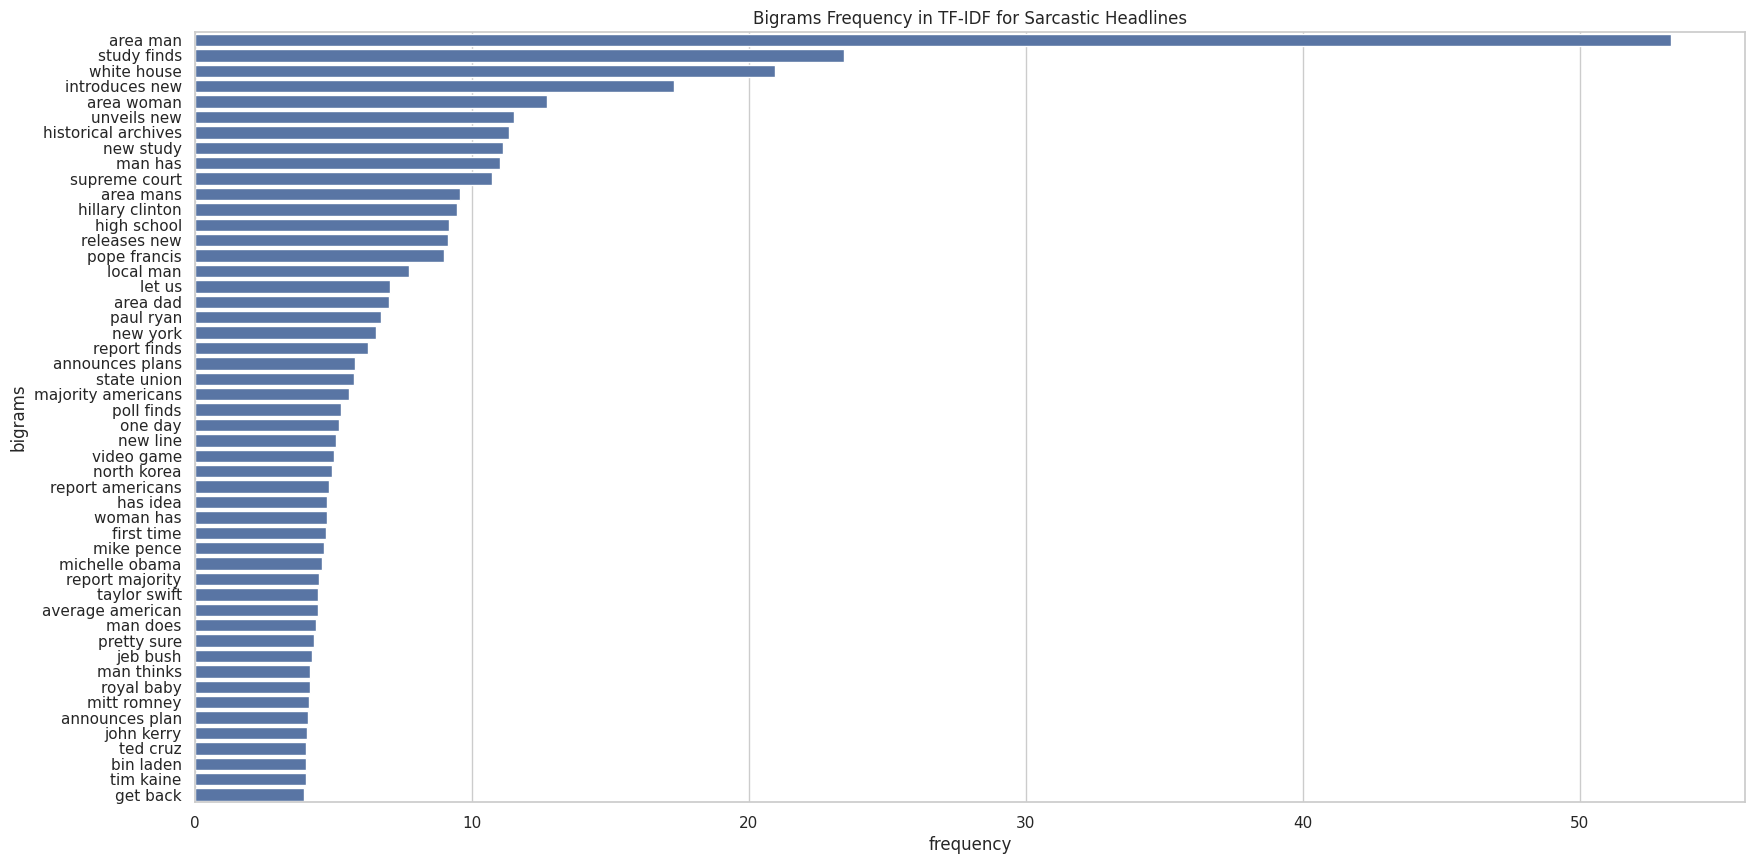

In [220]:
plt.figure(figsize=(20,10))
sns.barplot(data = bigrams_freq_sarcastic, x = "frequency", y="bigrams")
plt.title("Bigrams Frequency in TF-IDF for Sarcastic Headlines")
plt.show()

The top frequent bigrams "area man" as well as "area woman" are also the common sarcastic words.

In [223]:
# bigrams frequency of non-sarcastic headlines
processed_df_non_sarcastic = preprocessed_stopword_removed[preprocessed_stopword_removed['is_sarcastic']==0]

tfidf =  TfidfVectorizer(ngram_range=(2, 2))
bow_non_sarcastic = tfidf.fit_transform(processed_df_non_sarcastic['tokenized_text_nltk'].str.join(' '))
sum_of_words_non_sarcastic = bow_non_sarcastic.sum(axis=0)
bigrams_freq_non_sarcastic = [(word, sum_of_words_non_sarcastic[0, idx]) for word, idx in tfidf.vocabulary_.items()]
bigrams_freq_non_sarcastic =sorted(bigrams_freq_non_sarcastic, key = lambda x: x[1], reverse=True)
bigrams_freq_non_sarcastic = pd.DataFrame(bigrams_freq_non_sarcastic[:50], columns=["bigrams", "frequency"])

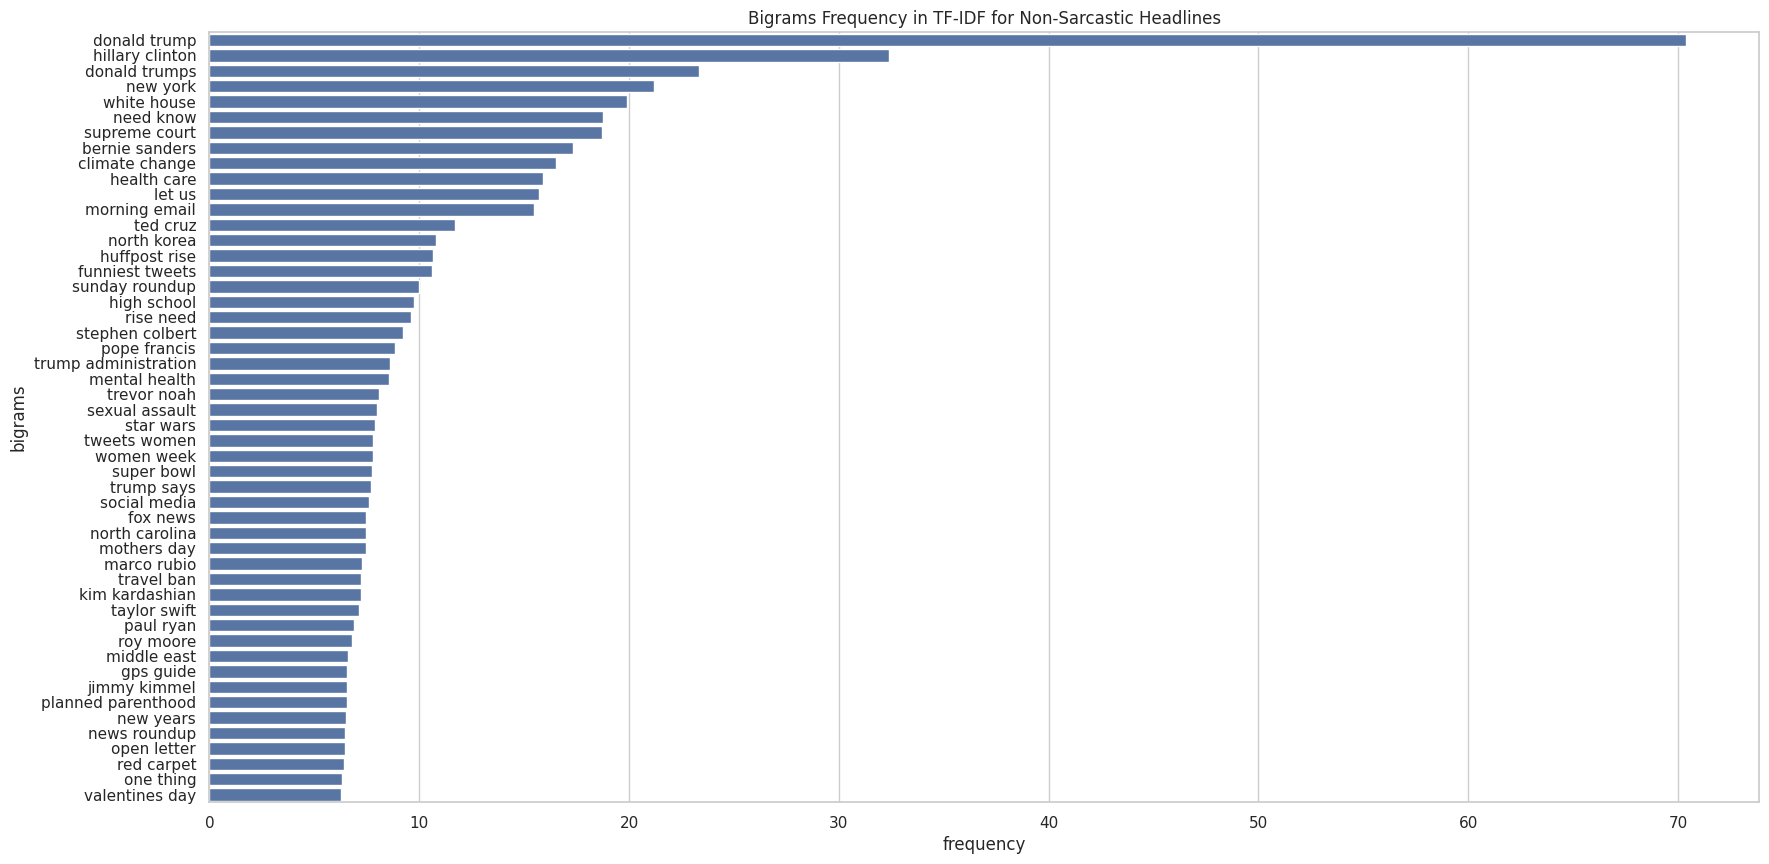

In [224]:
plt.figure(figsize=(20,10))
sns.barplot(data = bigrams_freq_non_sarcastic, x = "frequency", y="bigrams")
plt.title("Bigrams Frequency in TF-IDF for Non-Sarcastic Headlines")
plt.show()

In [215]:
# trigrams frequency
tfidf =  TfidfVectorizer(ngram_range=(3, 3))
bow = tfidf.fit_transform(preprocessed_stopword_removed['tokenized_text_nltk'].str.join(' '))
sum_of_words = bow.sum(axis=0)
trigrams_freq = [(word, sum_of_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
trigrams_freq =sorted(trigrams_freq, key = lambda x: x[1], reverse=True)
trigrams_freq = pd.DataFrame(trigrams_freq[:50], columns=["trigrams", "frequency"])

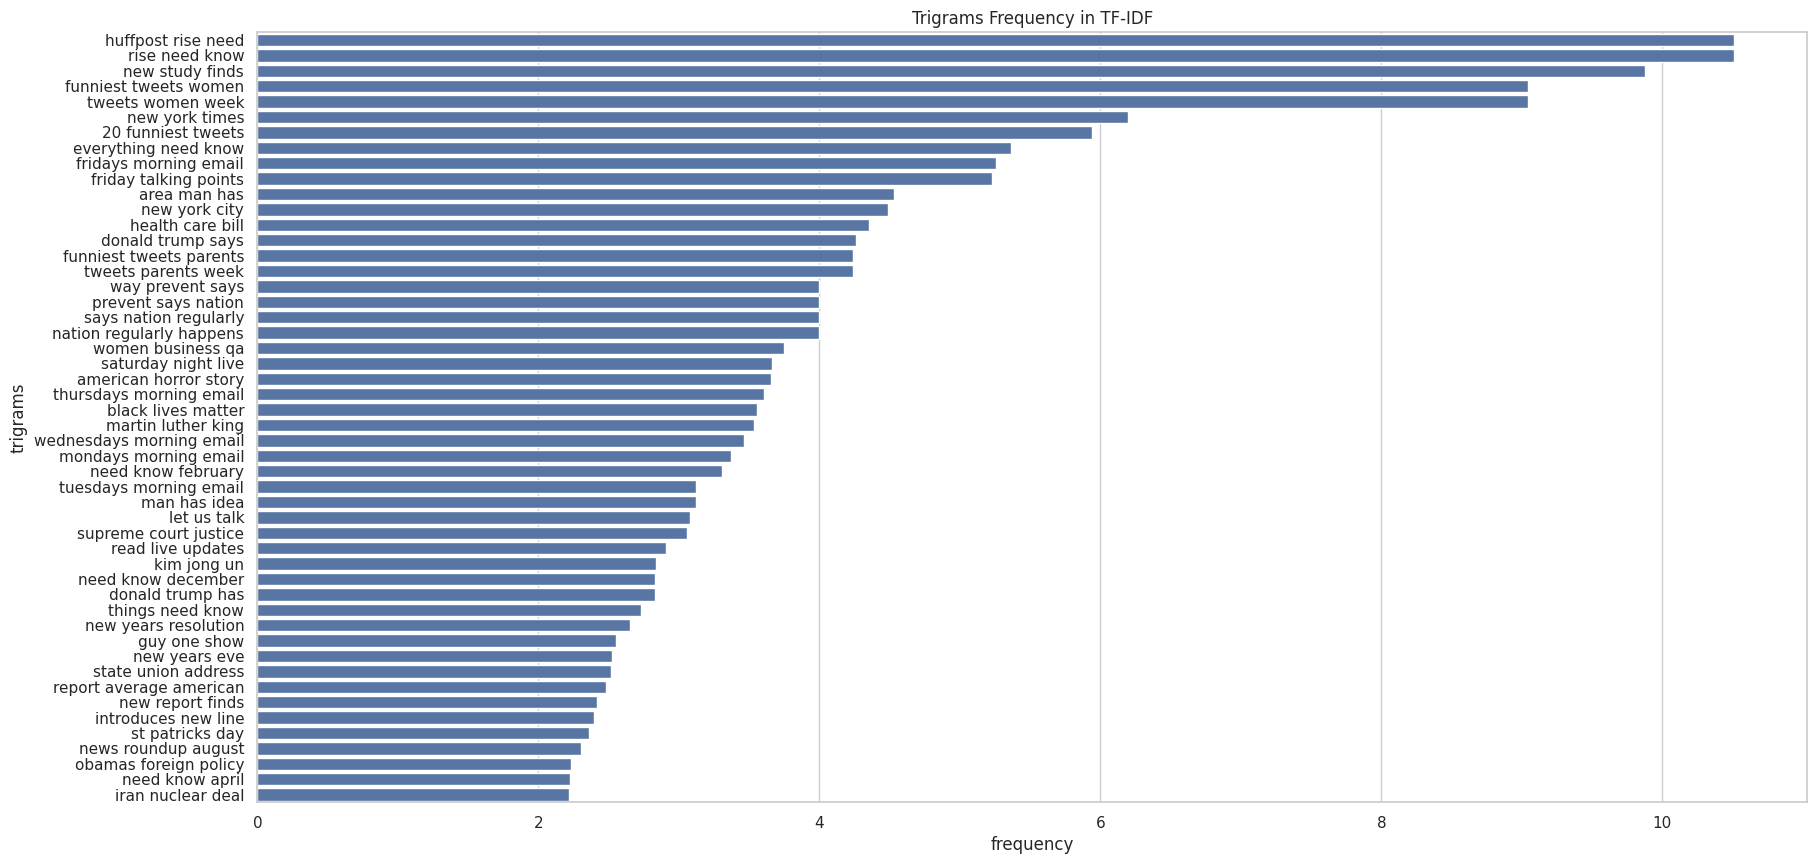

In [216]:
plt.figure(figsize=(20,10))
sns.barplot(data = trigrams_freq, x = "frequency", y="trigrams")
plt.title("Trigrams Frequency in TF-IDF")
plt.show()

In [225]:
# trigrams frequency of sarcastic headlines
tfidf =  TfidfVectorizer(ngram_range=(3, 3))
bow_sarcastic = tfidf.fit_transform(processed_df_sarcastic['tokenized_text_nltk'].str.join(' '))
sum_of_words_sarcastic = bow_sarcastic.sum(axis=0)
trigrams_freq_sarcastic = [(word, sum_of_words_sarcastic[0, idx]) for word, idx in tfidf.vocabulary_.items()]
trigrams_freq_sarcastic =sorted(trigrams_freq_sarcastic, key = lambda x: x[1], reverse=True)
trigrams_freq_sarcastic = pd.DataFrame(trigrams_freq_sarcastic[:50], columns=["trigrams", "frequency"])

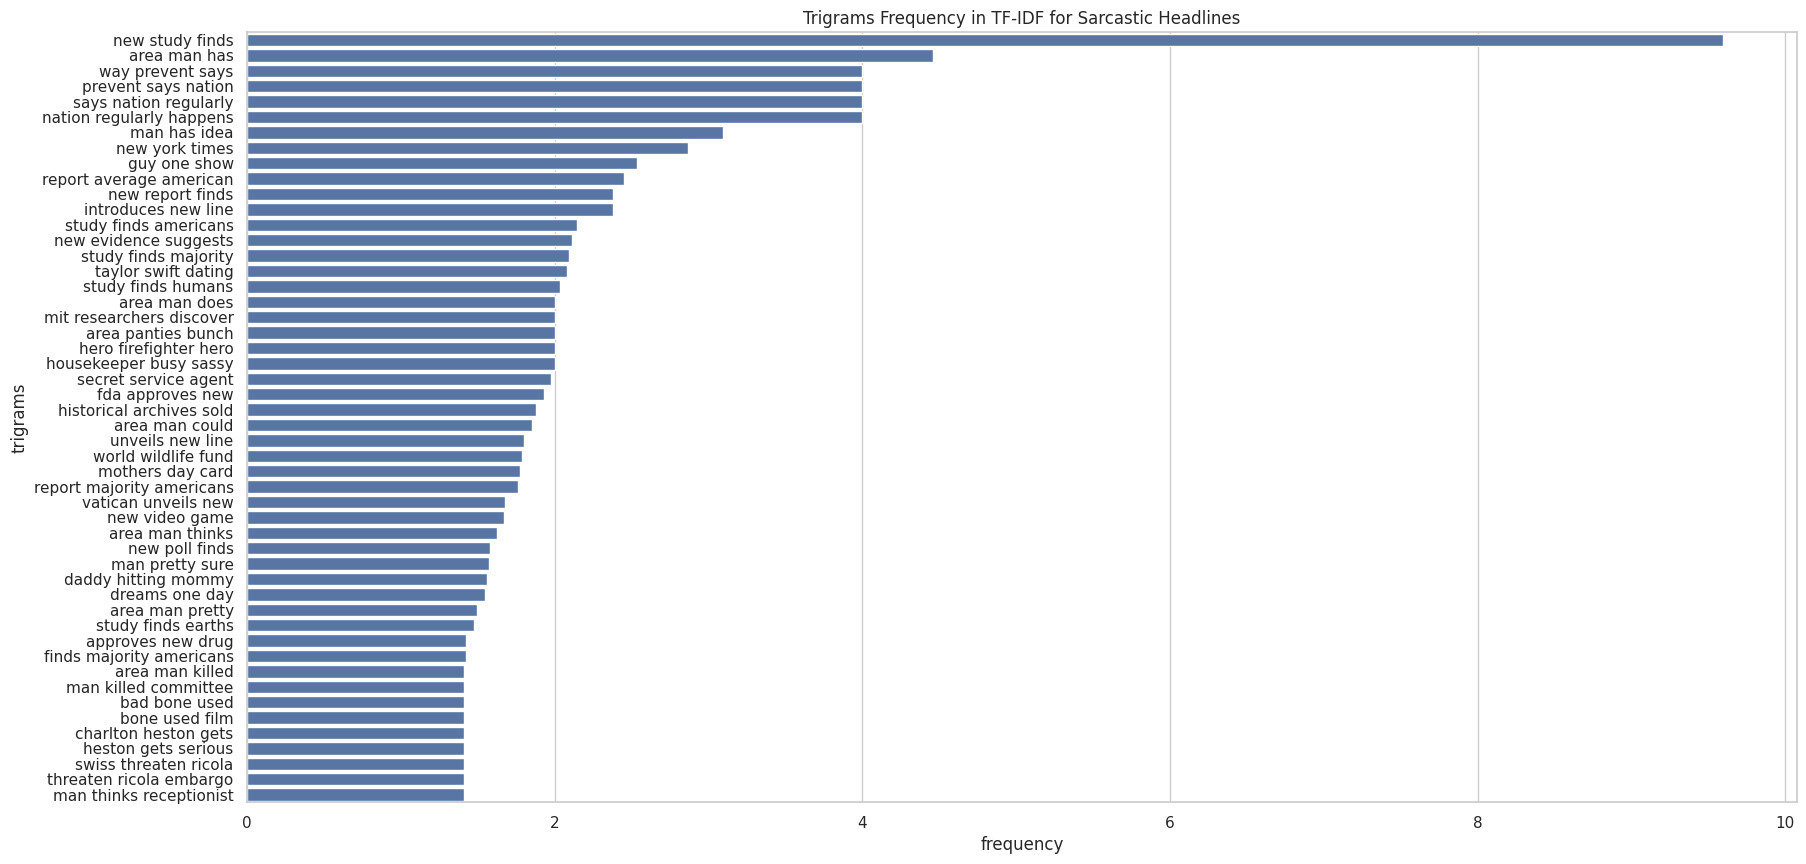

In [226]:
plt.figure(figsize=(20,10))
sns.barplot(data = trigrams_freq_sarcastic, x = "frequency", y="trigrams")
plt.title("Trigrams Frequency in TF-IDF for Sarcastic Headlines")
plt.show()

As can be seen from the most frequent n-gram words, there are many common sarcastic words appearing. These may be good features for us to use in detection of sarcastic headlines.



In [228]:
# trigrams frequency of non-sarcastic headlines
tfidf =  TfidfVectorizer(ngram_range=(3, 3))
bow_non_sarcastic = tfidf.fit_transform(processed_df_non_sarcastic['tokenized_text_nltk'].str.join(' '))
sum_of_words_non_sarcastic = bow_non_sarcastic.sum(axis=0)
trigrams_freq_non_sarcastic = [(word, sum_of_words_non_sarcastic[0, idx]) for word, idx in tfidf.vocabulary_.items()]
trigrams_freq_non_sarcastic =sorted(trigrams_freq_non_sarcastic, key = lambda x: x[1], reverse=True)
trigrams_freq_non_sarcastic = pd.DataFrame(trigrams_freq_non_sarcastic[:50], columns=["trigrams", "frequency"])

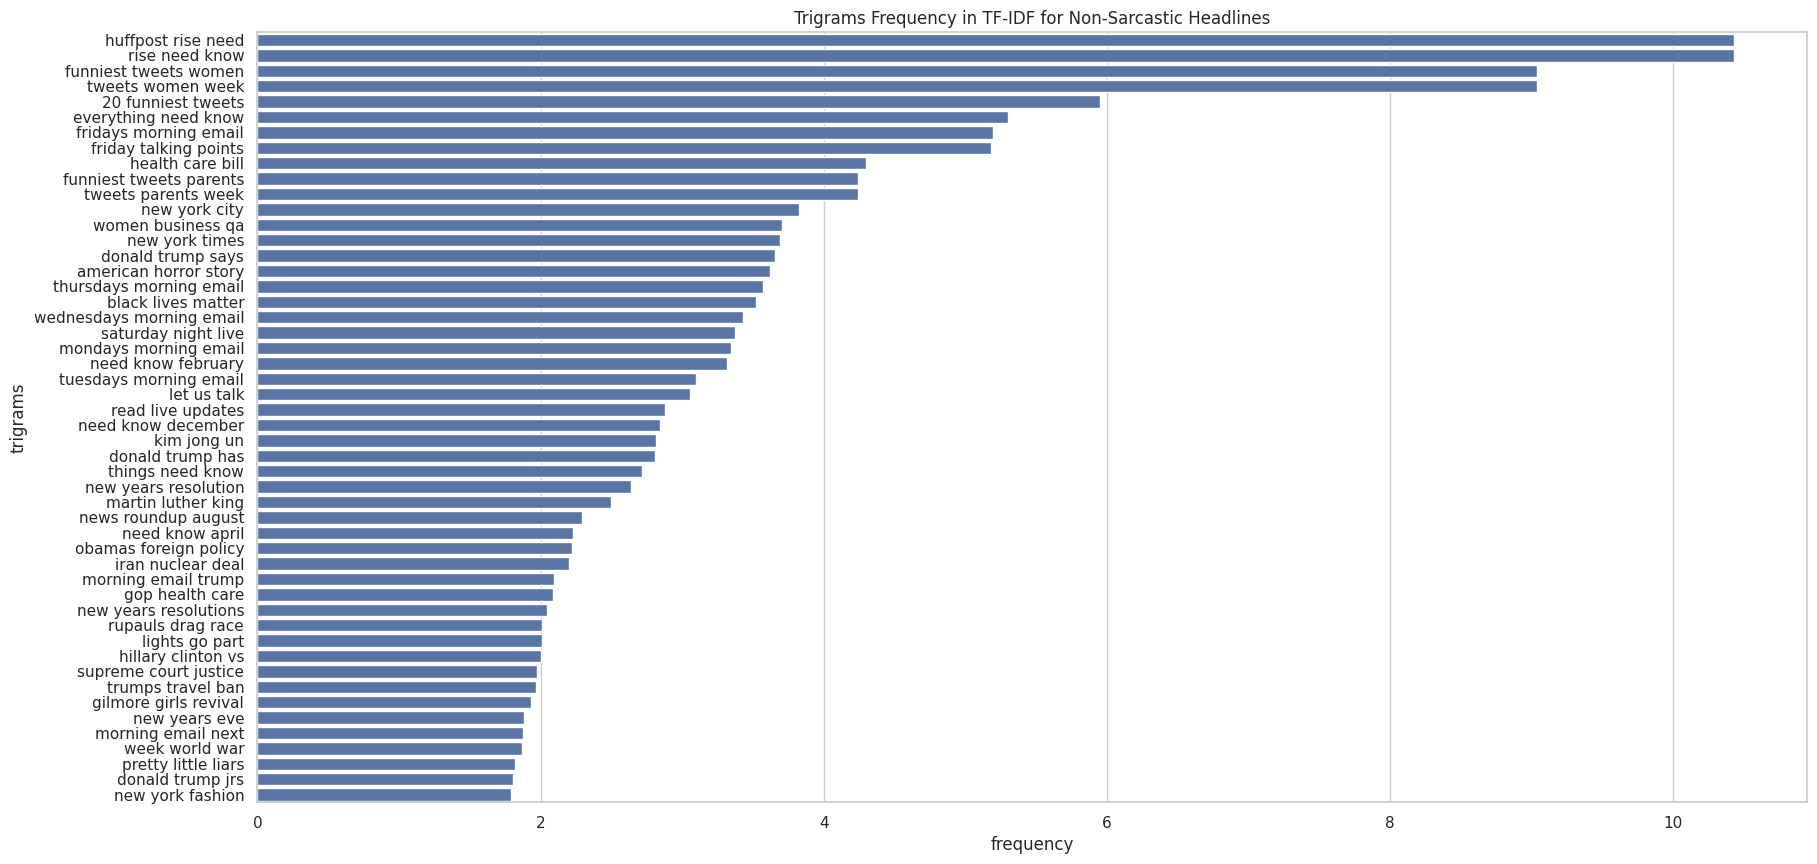

In [230]:
plt.figure(figsize=(20,10))
sns.barplot(data = trigrams_freq_non_sarcastic, x = "frequency", y="trigrams")
plt.title("Trigrams Frequency in TF-IDF for Non-Sarcastic Headlines")
plt.show()

# Sentiment Analysis

In [47]:
# for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# calculate VADER score
sentiments = SentimentIntensityAnalyzer()
sentiment_df = df[['headline', 'is_sarcastic','headline_cleaned']].copy()
sentiment_results = sentiment_df["headline_cleaned"].apply(sentiments.polarity_scores)

In [48]:
sentiment_df["Positive"] = list(map(lambda x: x['pos'], sentiment_results))
sentiment_df["Negative"] = list(map(lambda x: x['neg'], sentiment_results))
sentiment_df["Neutral"] = list(map(lambda x: x['neu'], sentiment_results))
sentiment_df["compound"] = list(map(lambda x: x['compound'], sentiment_results))
sentiment_df

,headline,is_sarcastic,headline_cleaned,Positive,Negative,Neutral,compound
0,former versace store clerk sues over secret 'b...,0,former versace store clerk sues over secret bl...,0.000,0.000,1.000,0.0000
1,the 'roseanne' revival catches up to our thorn...,0,the roseanne revival catches up to our thorny ...,0.152,0.272,0.576,-0.3182
2,mom starting to fear son's web series closest ...,1,mom starting to fear sons web series closest t...,0.000,0.198,0.802,-0.4939
3,"boehner just wants wife to listen, not come up...",1,boehner just wants wife to listen not come up ...,0.000,0.000,1.000,0.0000
4,j.k. rowling wishes snape happy birthday in th...,0,jk rowling wishes snape happy birthday in the ...,0.474,0.000,0.526,0.7351
...,...,...,...,...,...,...,...
26704,american politics in moral free-fall,0,american politics in moral freefall,0.000,0.000,1.000,0.0000
26705,america's best 20 hikes,0,americas best 20 hikes,0.583,0.000,0.417,0.6369
26706,reparations and obama,0,reparations and obama,0.000,0.000,1.000,0.0000
26707,israeli ban targeting boycott supporters raise...,0,israeli ban targeting boycott supporters raise...,0.191,0.546,0.263,-0.6597


/tmp/ipykernel_278483/3053463573.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sarcasm_sentiment_counts.index, y=sarcasm_sentiment_counts['Positive'], palette='Blues', label="Positive")


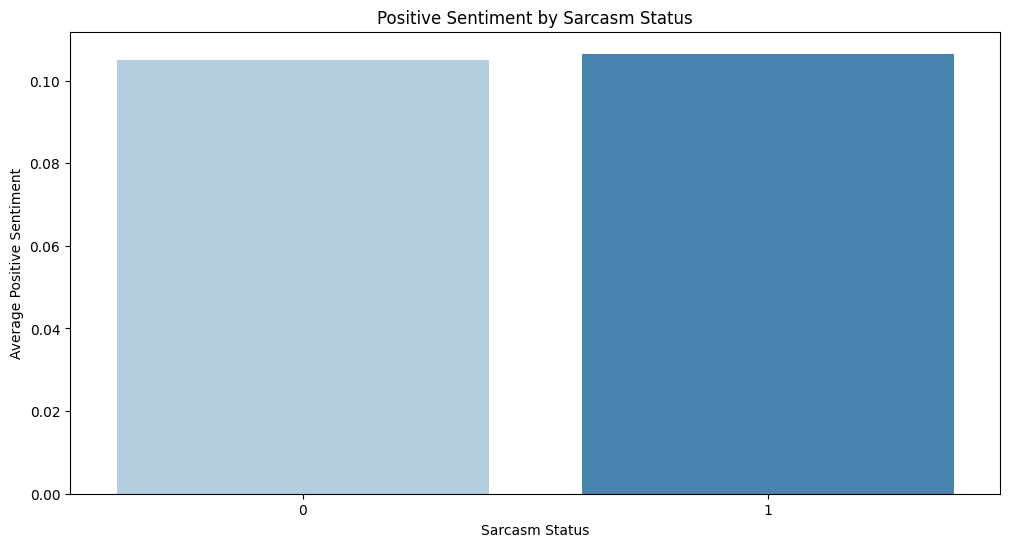

/tmp/ipykernel_278483/3053463573.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sarcasm_sentiment_counts.index, y=sarcasm_sentiment_counts['Negative'], palette='Reds', label="Negative")


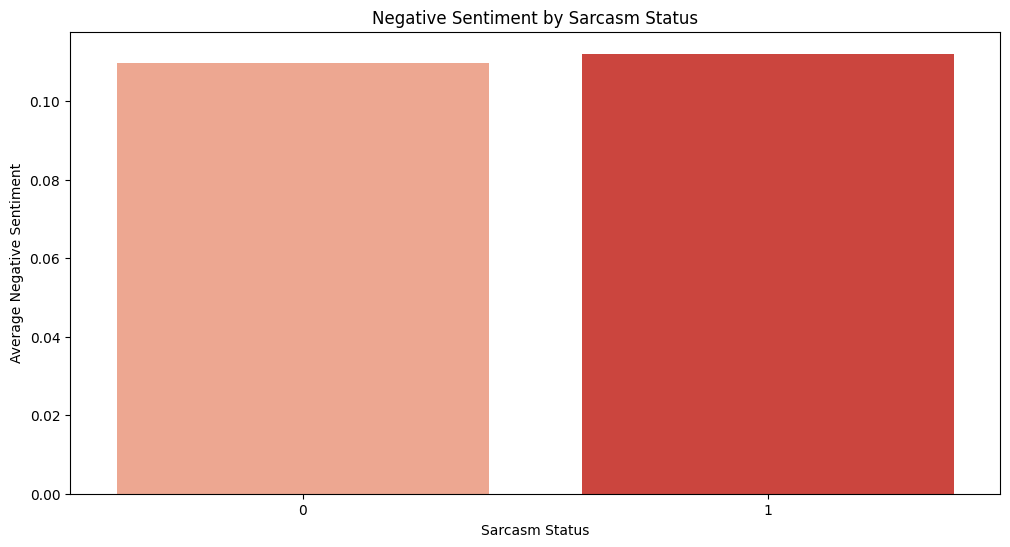

/tmp/ipykernel_278483/3053463573.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sarcasm_sentiment_counts.index, y=sarcasm_sentiment_counts['compound'], palette='Purples', label="Compound")


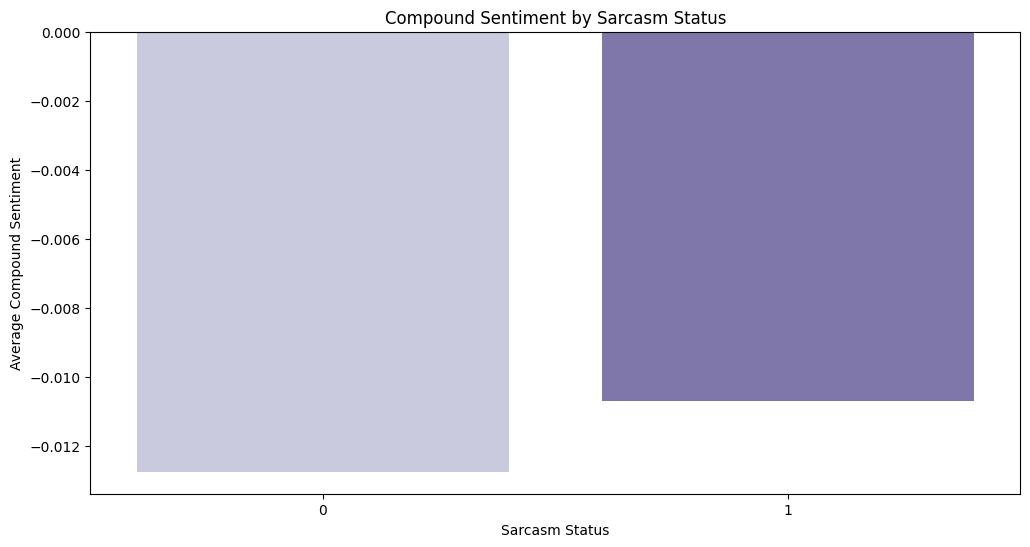

In [52]:
# Group by sarcasm status and count the sentiment distributions
sarcasm_sentiment_counts = sentiment_df.groupby("is_sarcastic")[["Positive", "Negative", "compound"]].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for positive sentiment
sns.barplot(x=sarcasm_sentiment_counts.index, y=sarcasm_sentiment_counts['Positive'], palette='Blues', label="Positive")
plt.title('Positive Sentiment by Sarcasm Status')
plt.xlabel('Sarcasm Status')
plt.ylabel('Average Positive Sentiment')
plt.show()

# Plot for negative sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x=sarcasm_sentiment_counts.index, y=sarcasm_sentiment_counts['Negative'], palette='Reds', label="Negative")
plt.title('Negative Sentiment by Sarcasm Status')
plt.xlabel('Sarcasm Status')
plt.ylabel('Average Negative Sentiment')
plt.show()

# Plot for compound sentiment
plt.figure(figsize=(12, 6))
sns.barplot(x=sarcasm_sentiment_counts.index, y=sarcasm_sentiment_counts['compound'], palette='Purples', label="Compound")
plt.title('Compound Sentiment by Sarcasm Status')
plt.xlabel('Sarcasm Status')
plt.ylabel('Average Compound Sentiment')
plt.show()


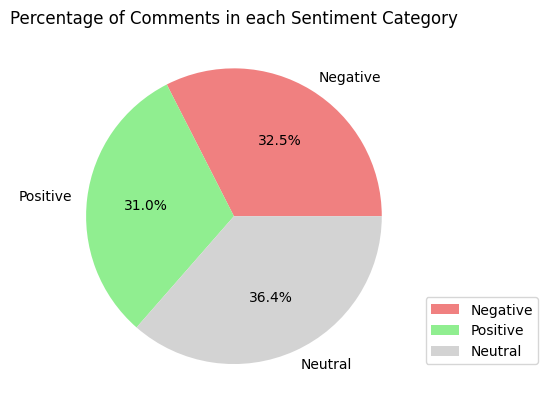

In [53]:
# visualize the distribution of sentiment category
senti_pie_count_list = []
senti_pie_count_list.append(len(sentiment_df[sentiment_df['compound'] < -0.05]))
senti_pie_count_list.append(len(sentiment_df[sentiment_df['compound'] > 0.05]))
senti_pie_count_list.append(len(sentiment_df[(sentiment_df['compound'] < 0.05) & (sentiment_df['compound'] > -0.05)]))

colors = ['lightcoral', 'lightgreen', 'lightgrey']
labels = ["Negative","Positive","Neutral"]

plt.pie(np.array(senti_pie_count_list),labels = labels, colors = colors,autopct='%1.1f%%')
plt.title("Percentage of Comments in each Sentiment Category")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

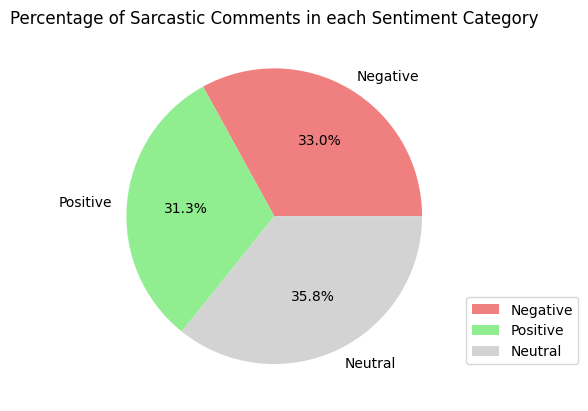

In [54]:
# visualize the distribution of sentiment category for toxic comments
semtiment_df_sarcastic = sentiment_df[sentiment_df['is_sarcastic'] == 1]

senti_pie_count_list = []
senti_pie_count_list.append(len(semtiment_df_sarcastic[semtiment_df_sarcastic['compound'] < -0.05]))
senti_pie_count_list.append(len(semtiment_df_sarcastic[semtiment_df_sarcastic['compound'] > 0.05]))
senti_pie_count_list.append(len(semtiment_df_sarcastic[(semtiment_df_sarcastic['compound'] < 0.05) & (semtiment_df_sarcastic['compound'] > -0.05)]))

colors = ['lightcoral', 'lightgreen', 'lightgrey']
labels = ["Negative","Positive","Neutral"]

plt.pie(np.array(senti_pie_count_list),labels = labels, colors = colors,autopct='%1.1f%%')
plt.title("Percentage of Sarcastic Comments in each Sentiment Category")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

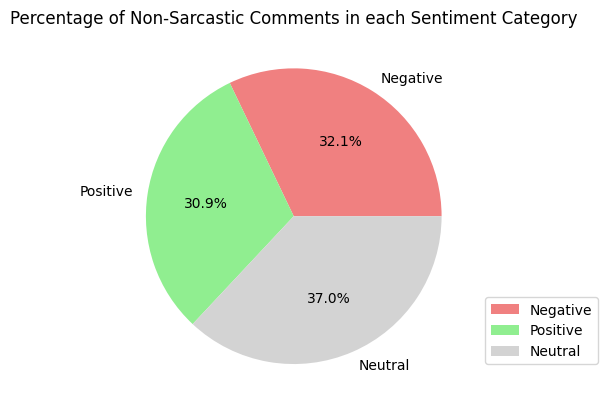

In [55]:
# visualize the distribution of sentiment category for toxic comments
semtiment_df_nonsarcastic = sentiment_df[sentiment_df['is_sarcastic'] == 0]

senti_pie_count_list = []
senti_pie_count_list.append(len(semtiment_df_nonsarcastic[semtiment_df_nonsarcastic['compound'] < -0.05]))
senti_pie_count_list.append(len(semtiment_df_nonsarcastic[semtiment_df_nonsarcastic['compound'] > 0.05]))
senti_pie_count_list.append(len(semtiment_df_nonsarcastic[(semtiment_df_nonsarcastic['compound'] < 0.05) & (semtiment_df_nonsarcastic['compound'] > -0.05)]))

colors = ['lightcoral', 'lightgreen', 'lightgrey']
labels = ["Negative","Positive","Neutral"]

plt.pie(np.array(senti_pie_count_list),labels = labels, colors = colors,autopct='%1.1f%%')
plt.title("Percentage of Non-Sarcastic Comments in each Sentiment Category")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()

# Superlative Existence

In [ ]:
import spacy
import re

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# Function to detect superlative adjectives using POS tagging
def contains_superlative(headline):
    doc = nlp(headline)
    superlatives = []
    
    for token in doc:
        if token.pos_ == "ADJ" and (token.tag_ == "JJS" or "most" in token.text.lower()):  # JJS is the POS tag for superlative adjectives
            superlatives.append(token.text)
    
    return superlatives


In [ ]:
df['superlative'] = df['headline_cleaned'].apply(contains_superlative)
df['superlative_existence'] = df['superlative'].apply(lambda x: 0 if len(x) == 0 else 1)

/tmp/ipykernel_278483/2893559492.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Superlative",data=word_counts_df.head(20), palette="Set2" )


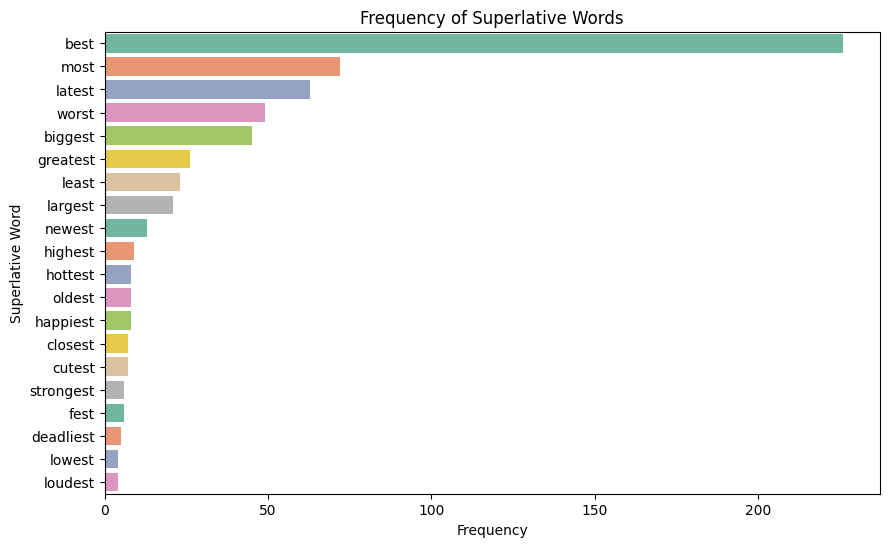

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Flatten the lists in the 'superlatives' column
superlative_words = [word for sublist in df['superlative'] for word in sublist]

# Count the frequency of each superlative word
word_counts = Counter(superlative_words)

# Convert the Counter into a DataFrame for easier plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=["Superlative", "Frequency"])
word_counts_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Plot the frequency of superlative words
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Superlative",data=word_counts_df.head(20), palette="Set2" )
plt.title("Frequency of Superlative Words")
plt.ylabel("Superlative Word")
plt.xlabel("Frequency")
plt.show()


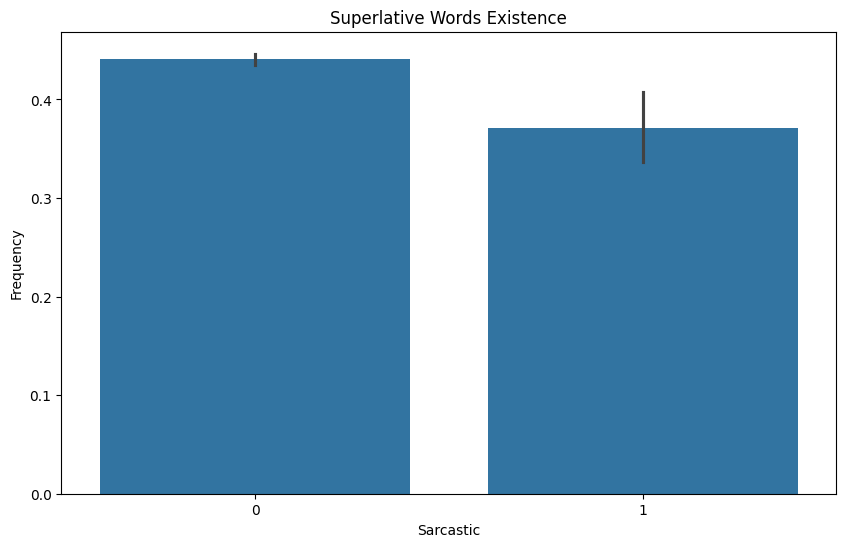

In [34]:
# Plot the frequency of superlative words
plt.figure(figsize=(10, 6))
sns.barplot(x="superlative_existence", y="is_sarcastic",data=df)
plt.title("Superlative Words Existence")
plt.ylabel("Frequency")
plt.xlabel("Sarcastic")
plt.show()

/tmp/ipykernel_278483/2023832921.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Superlative",data=word_counts_df.head(20), palette="Set2" )


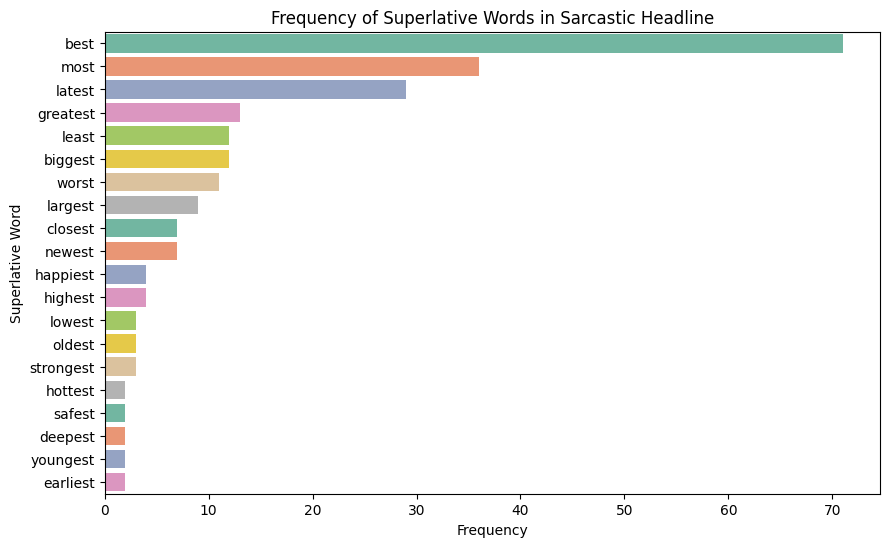

In [29]:
df_sarcastic = df[df['is_sarcastic'] == 1]
# Flatten the lists in the 'superlatives' column
superlative_words = [word for sublist in df_sarcastic['superlative'] for word in sublist]

# Count the frequency of each superlative word
word_counts = Counter(superlative_words)

# Convert the Counter into a DataFrame for easier plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=["Superlative", "Frequency"])
word_counts_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Plot the frequency of superlative words
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Superlative",data=word_counts_df.head(20), palette="Set2" )
plt.title("Frequency of Superlative Words in Sarcastic Headline")
plt.ylabel("Superlative Word")
plt.xlabel("Frequency")
plt.show()


/tmp/ipykernel_278483/1334075472.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Superlative",data=word_counts_df.head(20), palette="Set2" )


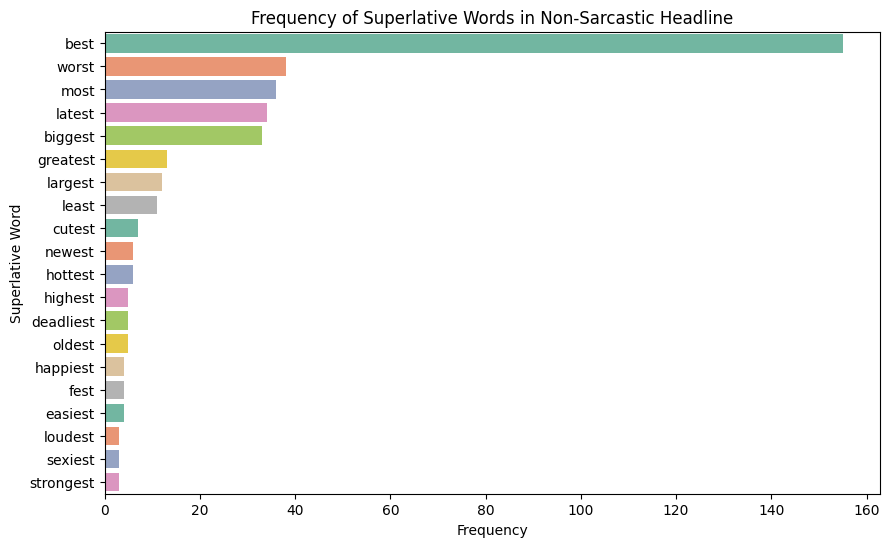

In [30]:
df_nonsarcastic = df[df['is_sarcastic'] == 0]
# Flatten the lists in the 'superlatives' column
superlative_words = [word for sublist in df_nonsarcastic['superlative'] for word in sublist]

# Count the frequency of each superlative word
word_counts = Counter(superlative_words)

# Convert the Counter into a DataFrame for easier plotting
word_counts_df = pd.DataFrame(word_counts.items(), columns=["Superlative", "Frequency"])
word_counts_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Plot the frequency of superlative words
plt.figure(figsize=(10, 6))
sns.barplot(x="Frequency", y="Superlative",data=word_counts_df.head(20), palette="Set2" )
plt.title("Frequency of Superlative Words in Non-Sarcastic Headline")
plt.ylabel("Superlative Word")
plt.xlabel("Frequency")
plt.show()


# Exclamatory Sentences


In [45]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to detect exclamatory sentences
def detect_exclamation(headline):
    # Regular expression patterns for detecting exclamatory sentences
    patterns = [
        r"(what|how)\s+[a-zA-Z].*!",           # What/How exclamations (e.g., "What a surprise!")
        r"such\s+[a-zA-Z].*!",                  # Such exclamations (e.g., "Such a clever idea!")
        r"[A-Za-z]+\s*!$",                      # Short exclamations (e.g., "Wow!" or "Amazing!")
        r"\b(how|what)\s+[a-zA-Z].*!\s*$"        # Exclamatory questions (e.g., "How did you manage to do that!")
    ]
    
    # Check if any pattern matches
    for pattern in patterns:
        if re.search(pattern, headline):
            return True
    return False

# Apply exclamation detection to the DataFrame
df['exclamation'] = df['headline_cleaned'].apply(detect_exclamation)

# Plot the existence of exclamatory sentences
exclamation_counts = df['exclamation'].value_counts()

/tmp/ipykernel_278483/115150919.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=exclamation_counts.index, y=exclamation_counts.values, palette="Set2")


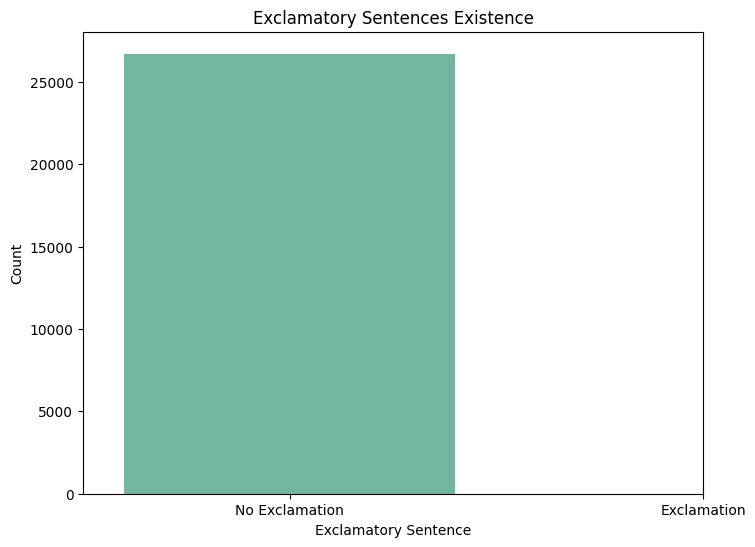

In [46]:
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=exclamation_counts.index, y=exclamation_counts.values, palette="Set2")
plt.title("Exclamatory Sentences Existence")
plt.xlabel("Exclamatory Sentence")
plt.ylabel("Count")
plt.xticks([0, 1], ['No Exclamation', 'Exclamation'], rotation=0)
plt.show()